

```
Following is the Data Dictionary for Credit Card dataset :-

CUST_ID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases
BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFF_PURCHASES : Maximum purchase amount done in one-go
INSTALLMENTS_PURCHASES : Amount of purchase done in installment
CASH_ADVANCE : Cash in advance given by the user
PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASES_TRX : Numbe of purchase transactions made
CREDIT_LIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user
```





```
Identify and handle null values
  - Deletion & Imputing
Plot histograms and analyze data
  - Found skewed data
Use Robust Scaling
Apply PCA (Why not LDA?) (Why not feature subset selection?)
Observe correlations between features
Display box plots for observing outliers
```



In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

```
Datatype of all prominent features is numeric, no Label Encoding needed.
Since the size of the dataset is just 8950 data points, Sampling is not required.
We'll use Random Sampling to look at the distributions followed by the features.

```



In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64



```
CREDIT_LIMIT has 1 null value
MINIMUM_PAYMENTS has 313 null values

Drop that single CREDIT_LIMIT null valued data point
Impute the 313 null values with median of MINIMUM_PAYMENTS because, as seen below, the values of CREDIT_LIMIT are a bit skewed.
```



In [6]:
# Code for dropping
df = df.dropna(subset = ['CREDIT_LIMIT'])

# Code for imputing
df.fillna(df.median(numeric_only=True) , inplace = True)

# Check number of nulls again
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64



```
Check for duplicate rows
```



In [7]:
# Code for checking and removing duplicated rows
df.duplicated().sum()

0

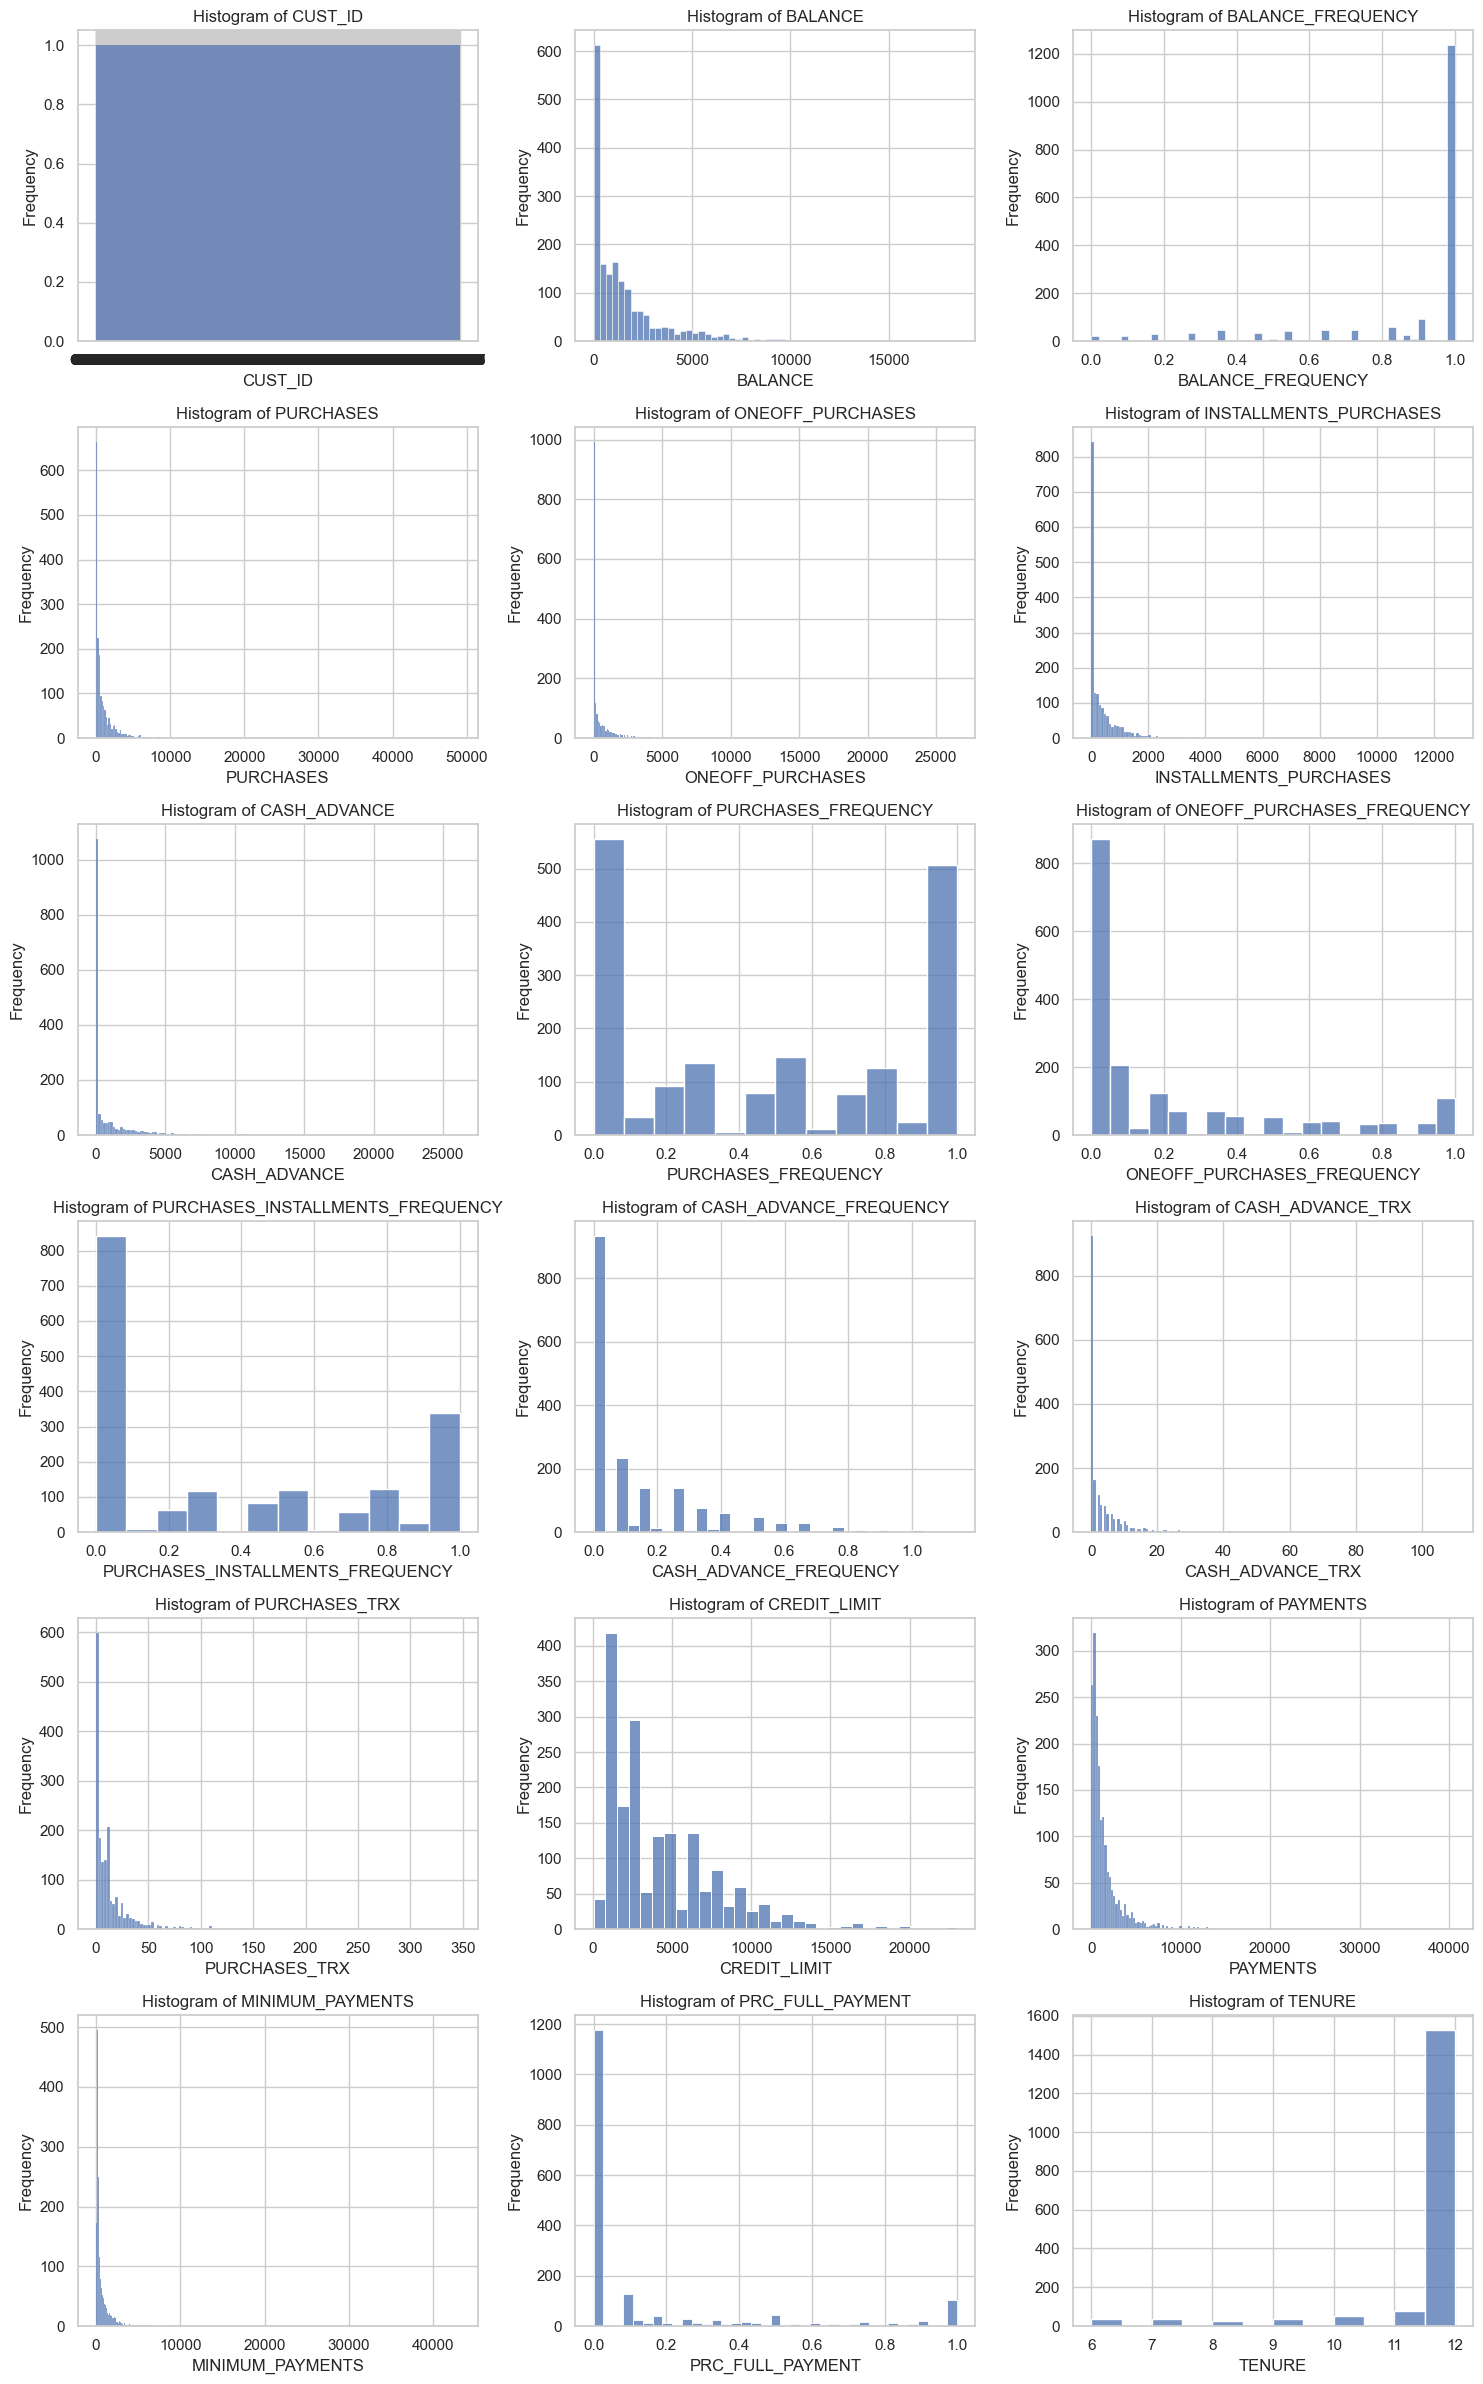

In [8]:
# Plot histograms for all features

sns.set(style="whitegrid")

num_cols = 3
num_rows = (len(df.columns) // num_cols)

# Set up subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))  # figsize as needed


# Plot histograms for all features
for i, column in enumerate(df.columns):
    row, col = divmod(i, num_cols)
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.histplot(df[column].sample(frac=0.2), kde=False, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()



```
95% of user have credit limit below 13.000 with balance keep below 8.000. We assume this is the general population of the data reside.
Some feature like `purchases`, `oneoff_purchases`, `INSTALLMENT_purchases`, and `cash_advance` show the same trends as balance and credit limit.
```





```
As we can see above almost all features have skewed distributions
Since skewed data, we need to use Robust Scaling
```



In [9]:
numericDF = df.drop('CUST_ID', axis=1)
numericDF

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.452292,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaledData = scaler.fit_transform(numericDF)

# Change it into a dataframe again, after scaling
scaledData = pd.DataFrame(scaledData)

scaledData

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.432387,-1.636364,-0.248596,-0.065763,0.013656,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431661,-0.279912,0.000000,0.0
1,1.209127,-0.818182,-0.337724,-0.065763,-0.189907,5.784296,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138325,1.229899,1.555556,0.0
2,0.841881,0.000000,0.384615,1.272295,-0.189907,0.000000,0.600000,3.055557,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154807,0.509565,0.000000,0.0
3,0.411728,-3.272727,1.062726,2.528425,-0.189907,0.184751,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564601,0.000000,0.000000,0.0
4,-0.029058,0.000000,-0.322776,-0.038073,-0.189907,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117739,-0.109511,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.438828,0.000000,-0.065744,-0.065763,0.431281,0.000000,0.600000,-0.277777,0.888888,0.000000,0.00,-0.0625,-0.408163,-0.350112,-0.426588,3.500004,-6.0
8945,-0.443662,0.000000,-0.057447,-0.065763,0.450229,0.000000,0.600000,-0.277777,0.888888,0.000000,0.00,-0.0625,-0.408163,-0.382874,0.000000,0.000000,-6.0
8946,-0.441474,-1.500005,-0.202818,-0.065763,0.118212,0.000000,0.399999,-0.277777,0.666667,0.000000,0.00,-0.1250,-0.408163,-0.511063,-0.372316,1.750002,-6.0
8947,-0.446635,-1.500005,-0.337724,-0.065763,-0.189907,0.032821,-0.600000,-0.277777,-0.222223,0.750002,0.50,-0.4375,-0.510204,-0.529983,-0.415470,1.750002,-6.0


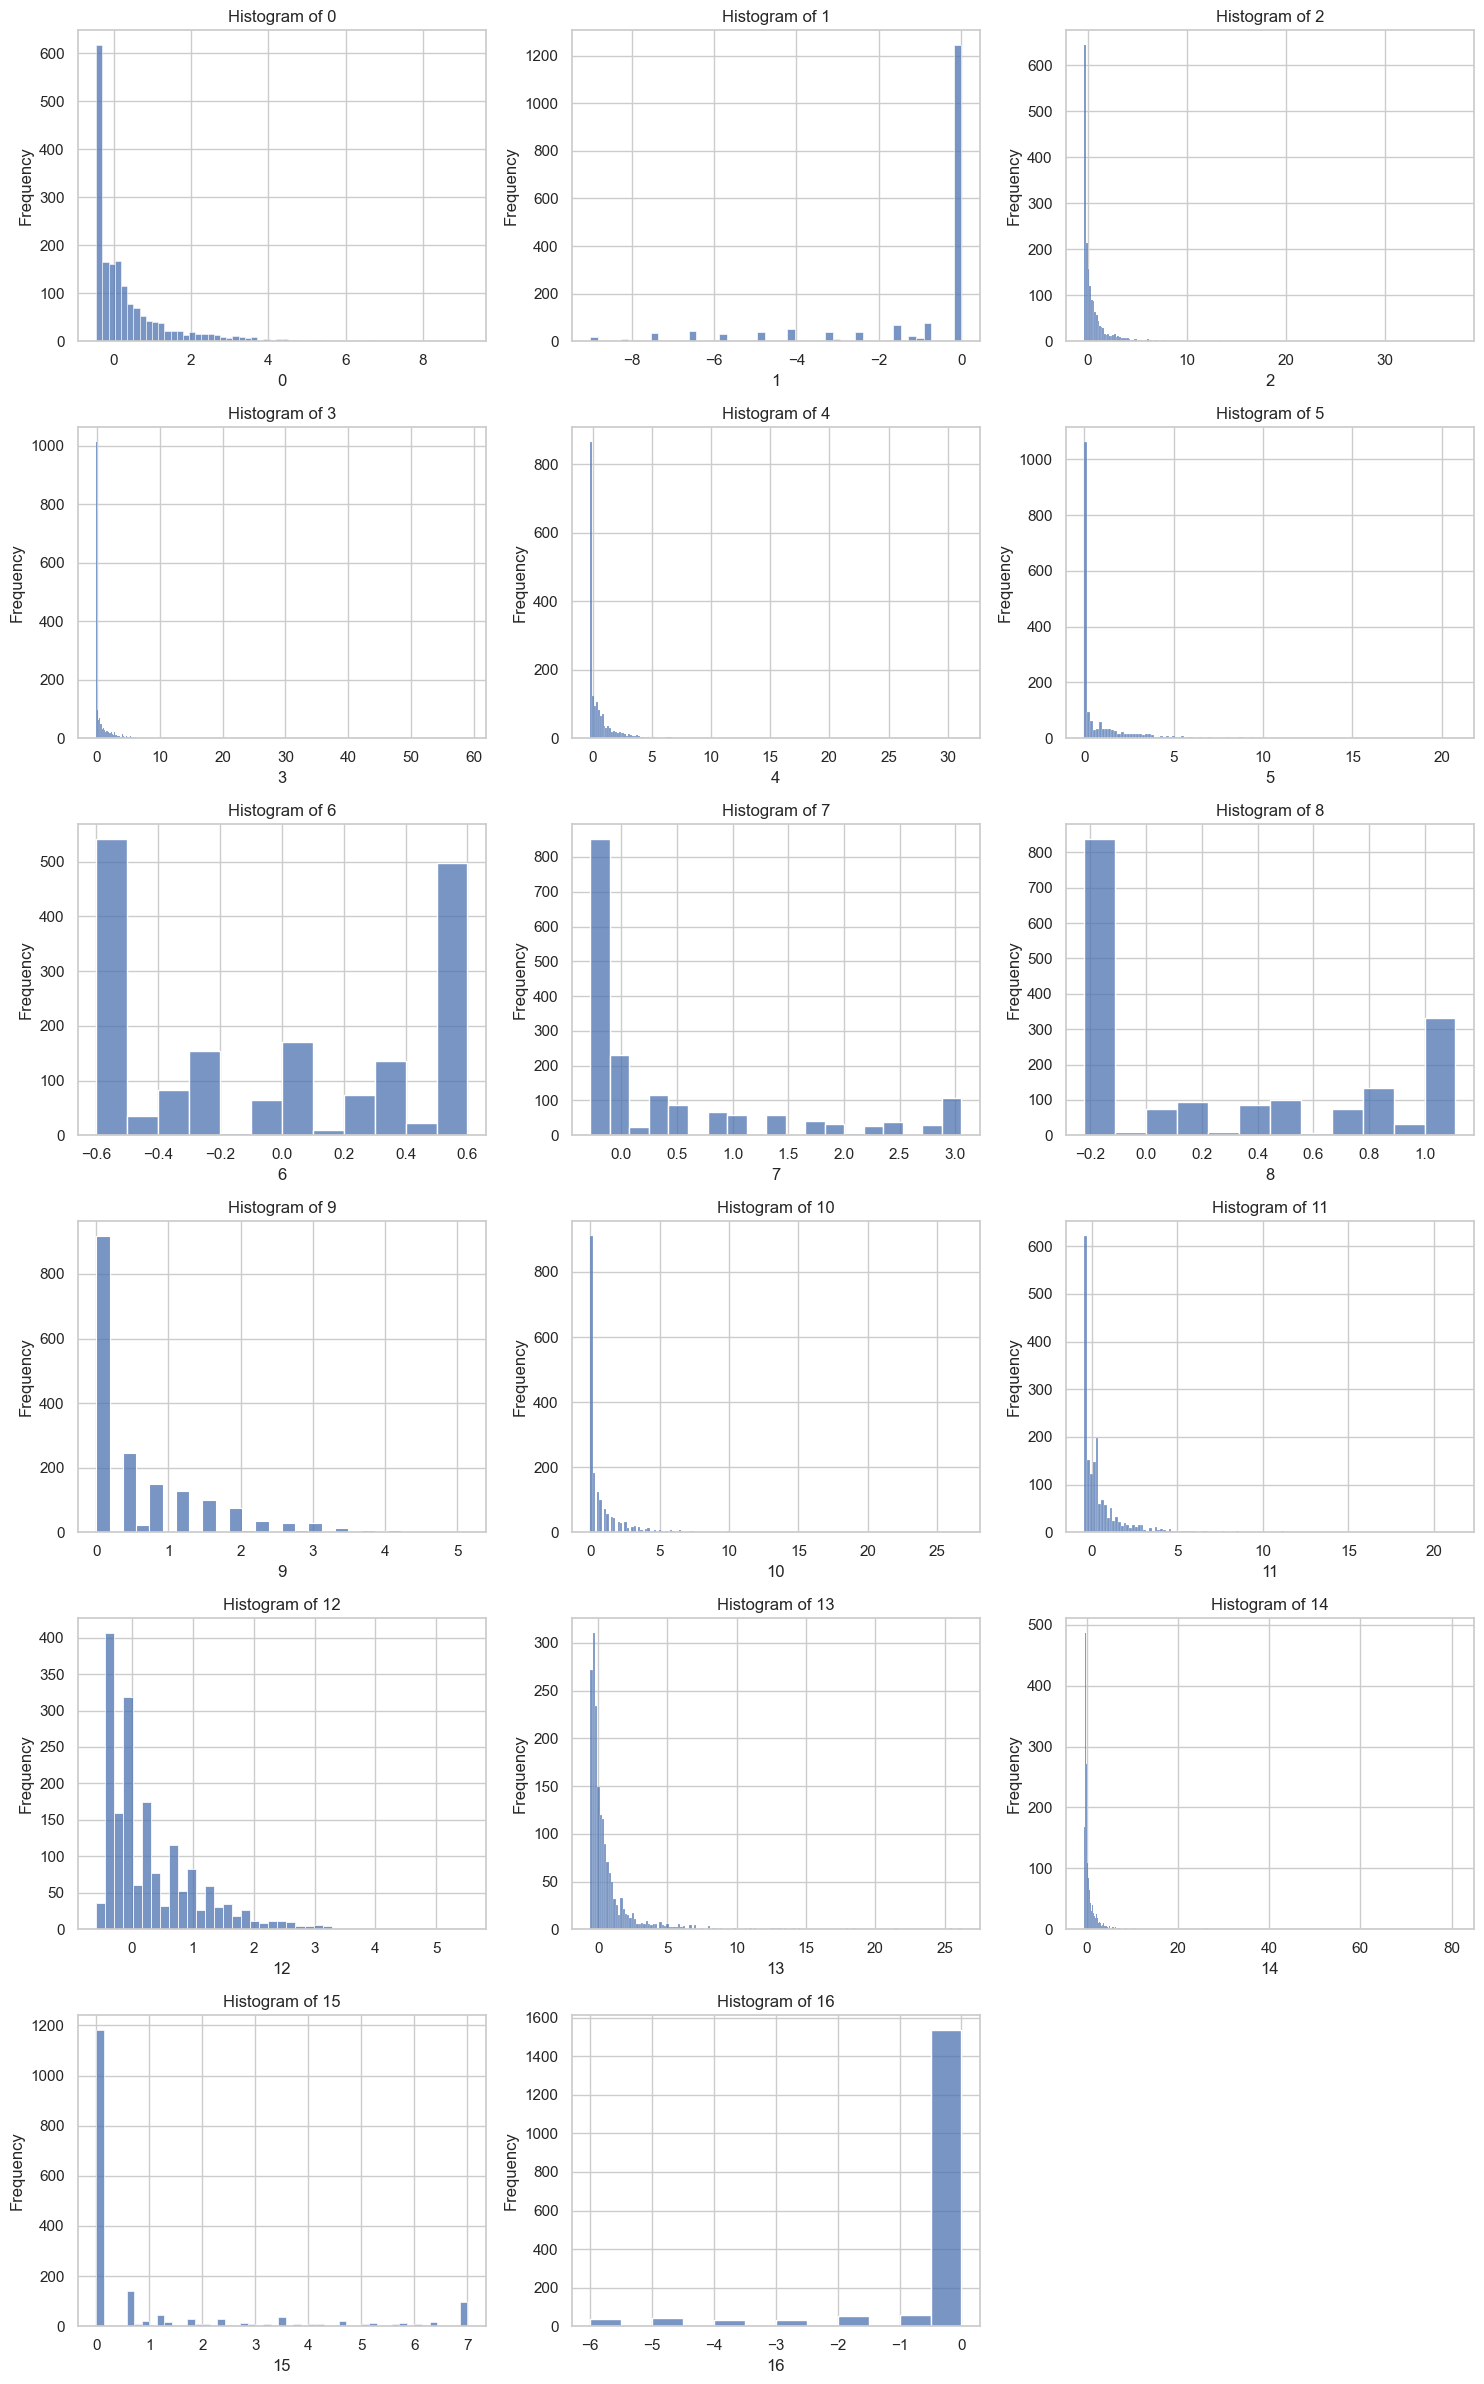

In [11]:
# Plot histograms for all features

sns.set(style="whitegrid")

num_cols = 3
num_rows = -(-len(scaledData.columns) // num_cols)

# Set up subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))  # figsize as needed


# Plot histograms for all features
for i, column in enumerate(scaledData.columns):
    row, col = divmod(i, num_cols)
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.histplot(scaledData[column].sample(frac=0.2), kde=False, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Delete empty plots
for i in range(len(scaledData.columns), num_rows * num_cols):
    row, col = divmod(i, num_cols)
    if num_rows > 1:
        fig.delaxes(axes[row, col])
    else:
        fig.delaxes(axes[col])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()



```
We would not want to apply feature subset selection as we don't want to completely eliminate any single feature.
If wanting to reduce dimensionality, will do Dimensionality Reduction techniques like PCA, but not completely eliminating features.
```



    Number of Components  Cumulative Variance (%)
0                      1                 0.302618
1                      2                 0.548290
2                      3                 0.671574
3                      4                 0.751784
4                      5                 0.821328
5                      6                 0.874593
6                      7                 0.907124
7                      8                 0.933291
8                      9                 0.953408
9                     10                 0.968239
10                    11                 0.979301
11                    12                 0.987894
12                    13                 0.992680
13                    14                 0.996570
14                    15                 0.999777
15                    16                 0.999999
16                    17                 1.000000


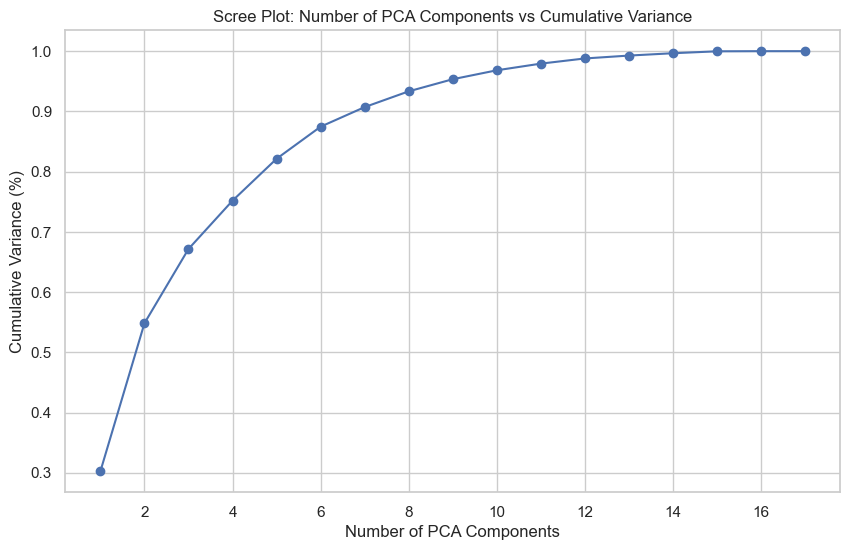

In [12]:
from sklearn.decomposition import PCA

# Create a list to store the cumulative variance
cumulative_variance = []

# All numeric components
max_components = 17

# Create a list to store the results
results = []

# Iterate over different numbers of components
for n_components in range(1, max_components + 1):
    # Create a PCA instance
    pca = PCA(n_components=n_components)

    # Fit the PCA model
    pca.fit_transform(scaledData)

    # Calculate the cumulative variance
    cumulative_var = np.sum(pca.explained_variance_ratio_)

    # Append results to the list
    results.append({'Number of Components': n_components, 'Cumulative Variance (%)': cumulative_var})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the table
print(results_df)

# Plotting the scree plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['Number of Components'], results_df['Cumulative Variance (%)'], marker='o')
plt.title('Scree Plot: Number of PCA Components vs Cumulative Variance')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Variance (%)')
plt.grid(True)
plt.show()



```
Therefore, 9 components would be enough to capture just above 95% of the variance present in the original scaled data
```



In [13]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Specify the number of components you want to keep
n_components = 9

# Create a PCA instance
pca = PCA(n_components=n_components)

# Fit the PCA model and transform the data
principal_components = pca.fit_transform(scaledData)

variance_ratio = pca.explained_variance_ratio_
total_variance_covered = sum(variance_ratio) * 100

print(f"Captured Variance is {total_variance_covered}%\n")

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

# Visualize the results or use the principal components for further analysis
print(pc_df.head())

Captured Variance is 95.34084923358988%

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.587965  0.077831 -0.940403 -0.260173  1.208714  0.480389  0.595261   
1 -0.225555  1.786324  3.862349  1.468670 -1.435857 -0.785026  1.569306   
2 -0.196583 -0.332148 -0.516845 -1.854808  1.495065 -0.648796  0.513094   
3 -0.639290 -1.040353 -0.736247  1.413810  2.743448  0.170063  0.237611   
4 -2.197516  0.305446 -0.452390 -1.581775  1.011763 -0.219934  0.771378   

        PC8       PC9  
0 -0.138430  0.533901  
1 -1.623759 -1.040974  
2  0.325037 -1.477918  
3  0.651254  0.452221  
4 -0.572125  0.505565  


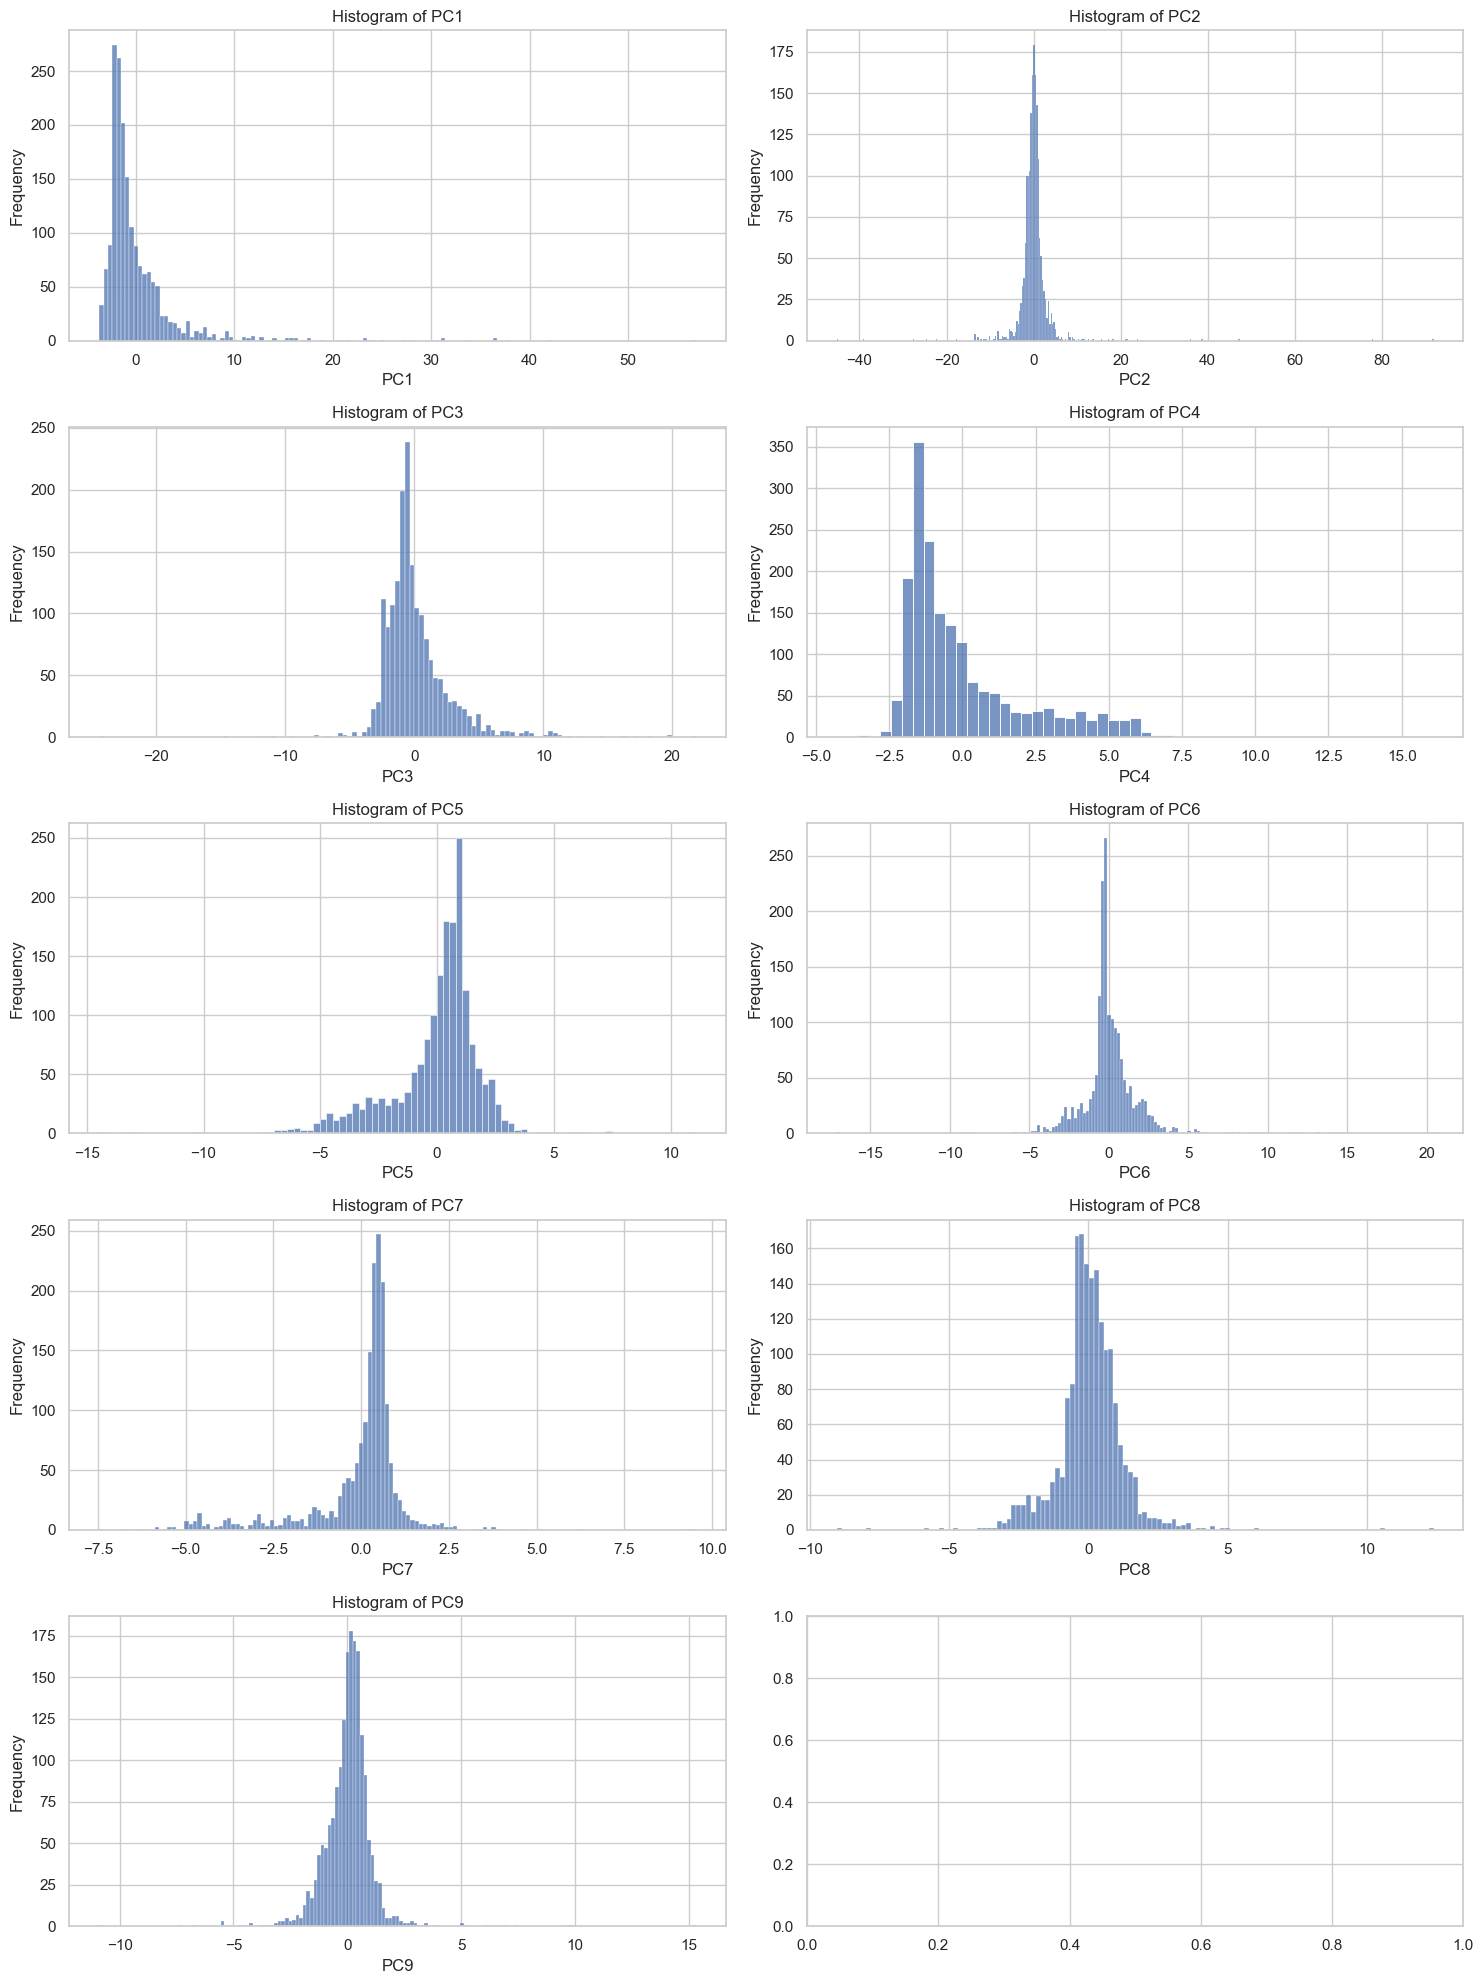

In [14]:
# Plot histograms for all features

sns.set(style="whitegrid")

num_cols = 2
num_rows = -(-len(pc_df.columns) // num_cols)

# Set up subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))  # figsize as needed


# Plot histograms for all features
for i, column in enumerate(pc_df.columns):
    row, col = divmod(i, num_cols)
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.histplot(pc_df[column].sample(frac=0.2), kde=False, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Delete empty plots
for i in range(len(scaledData.columns), num_rows * num_cols):
    row, col = divmod(i, num_cols)
    if num_rows > 1:
        fig.delaxes(axes[row, col])
    else:
        fig.delaxes(axes[col])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()



```
Since the data is skewed, we need to apply Clustering techniques like DBSCAN and avoid techniques like K-Means Algorithm which is sensitive to outliers
```



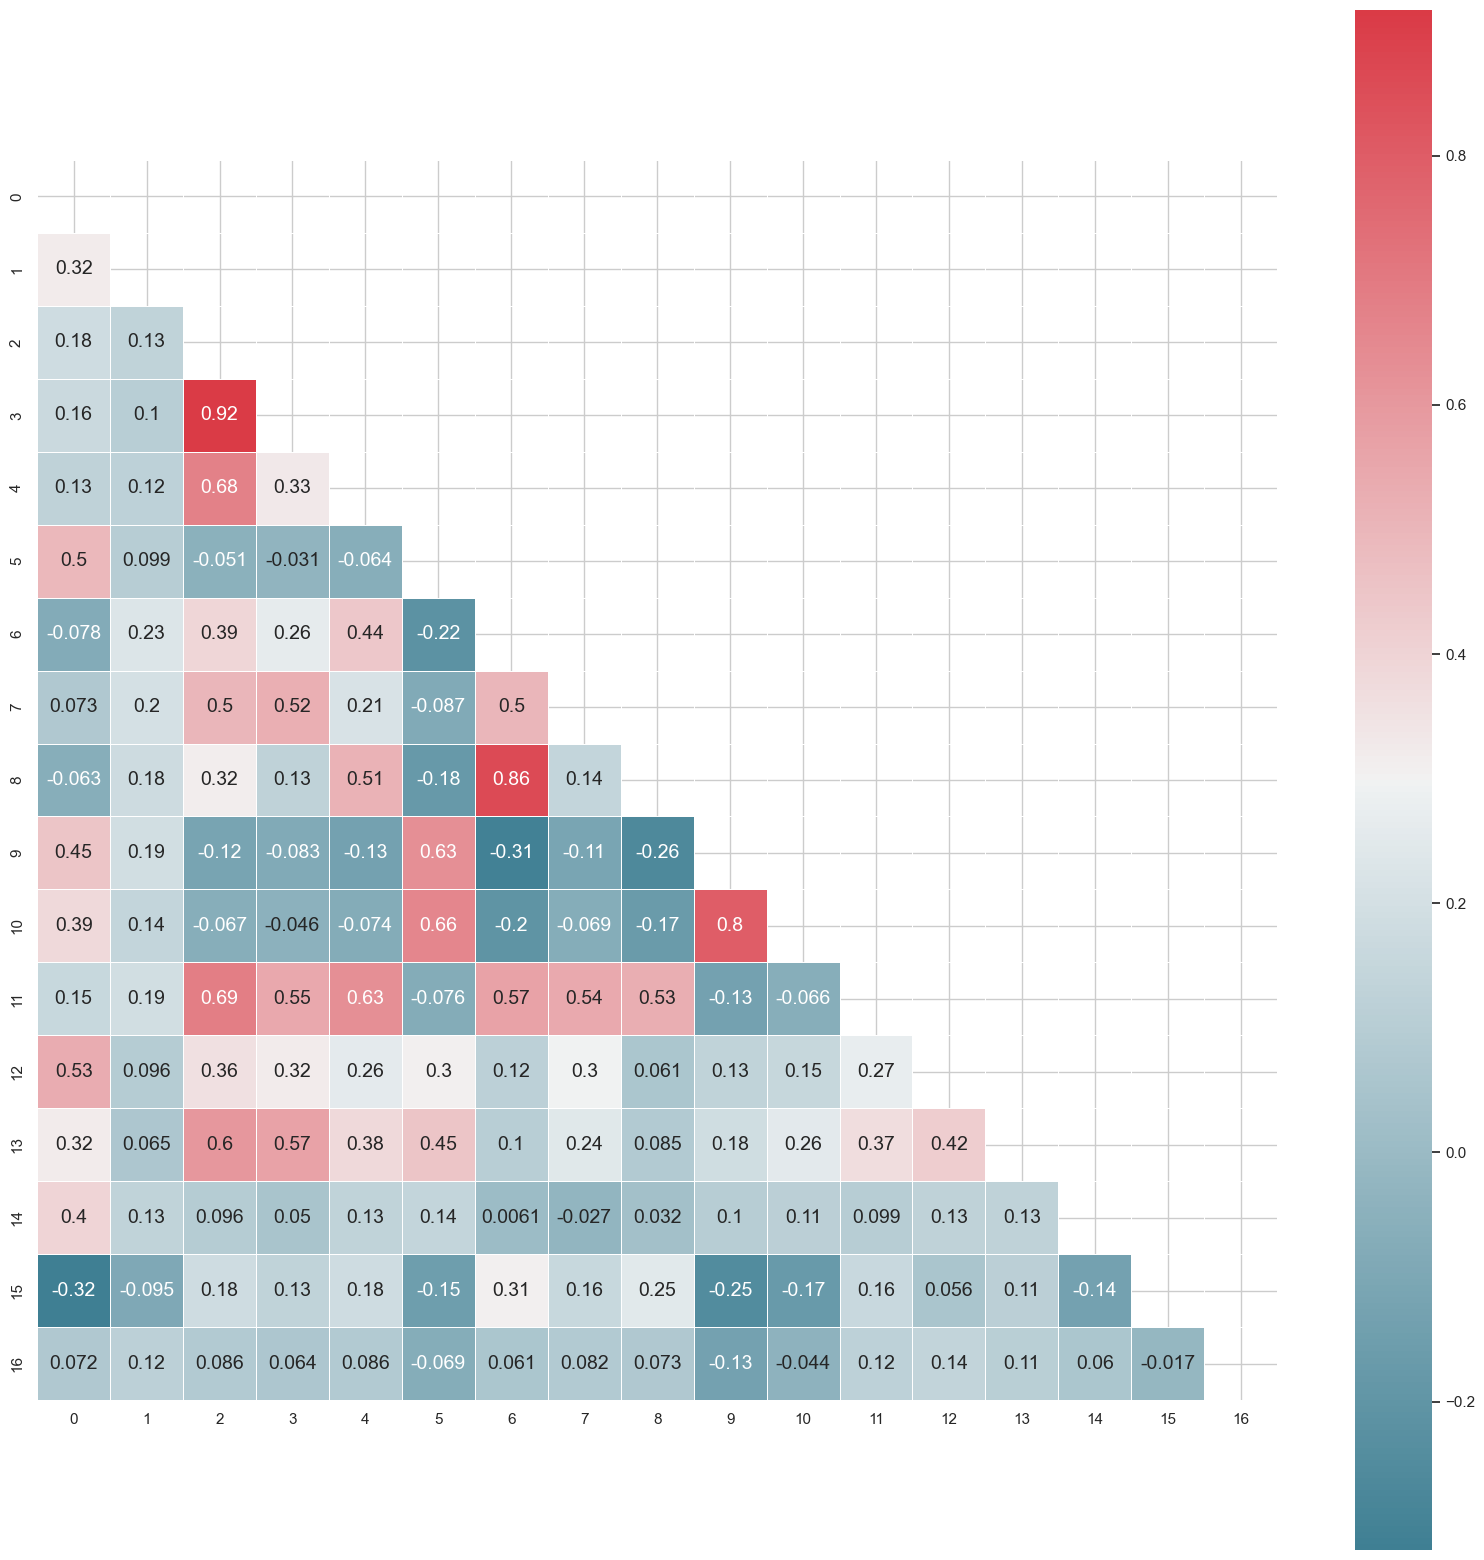

In [15]:
# calculates the correlations
correlation = scaledData.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(20, 20)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=.5,
            annot=True, annot_kws={'size':14})

# displays the plot
plt.show()

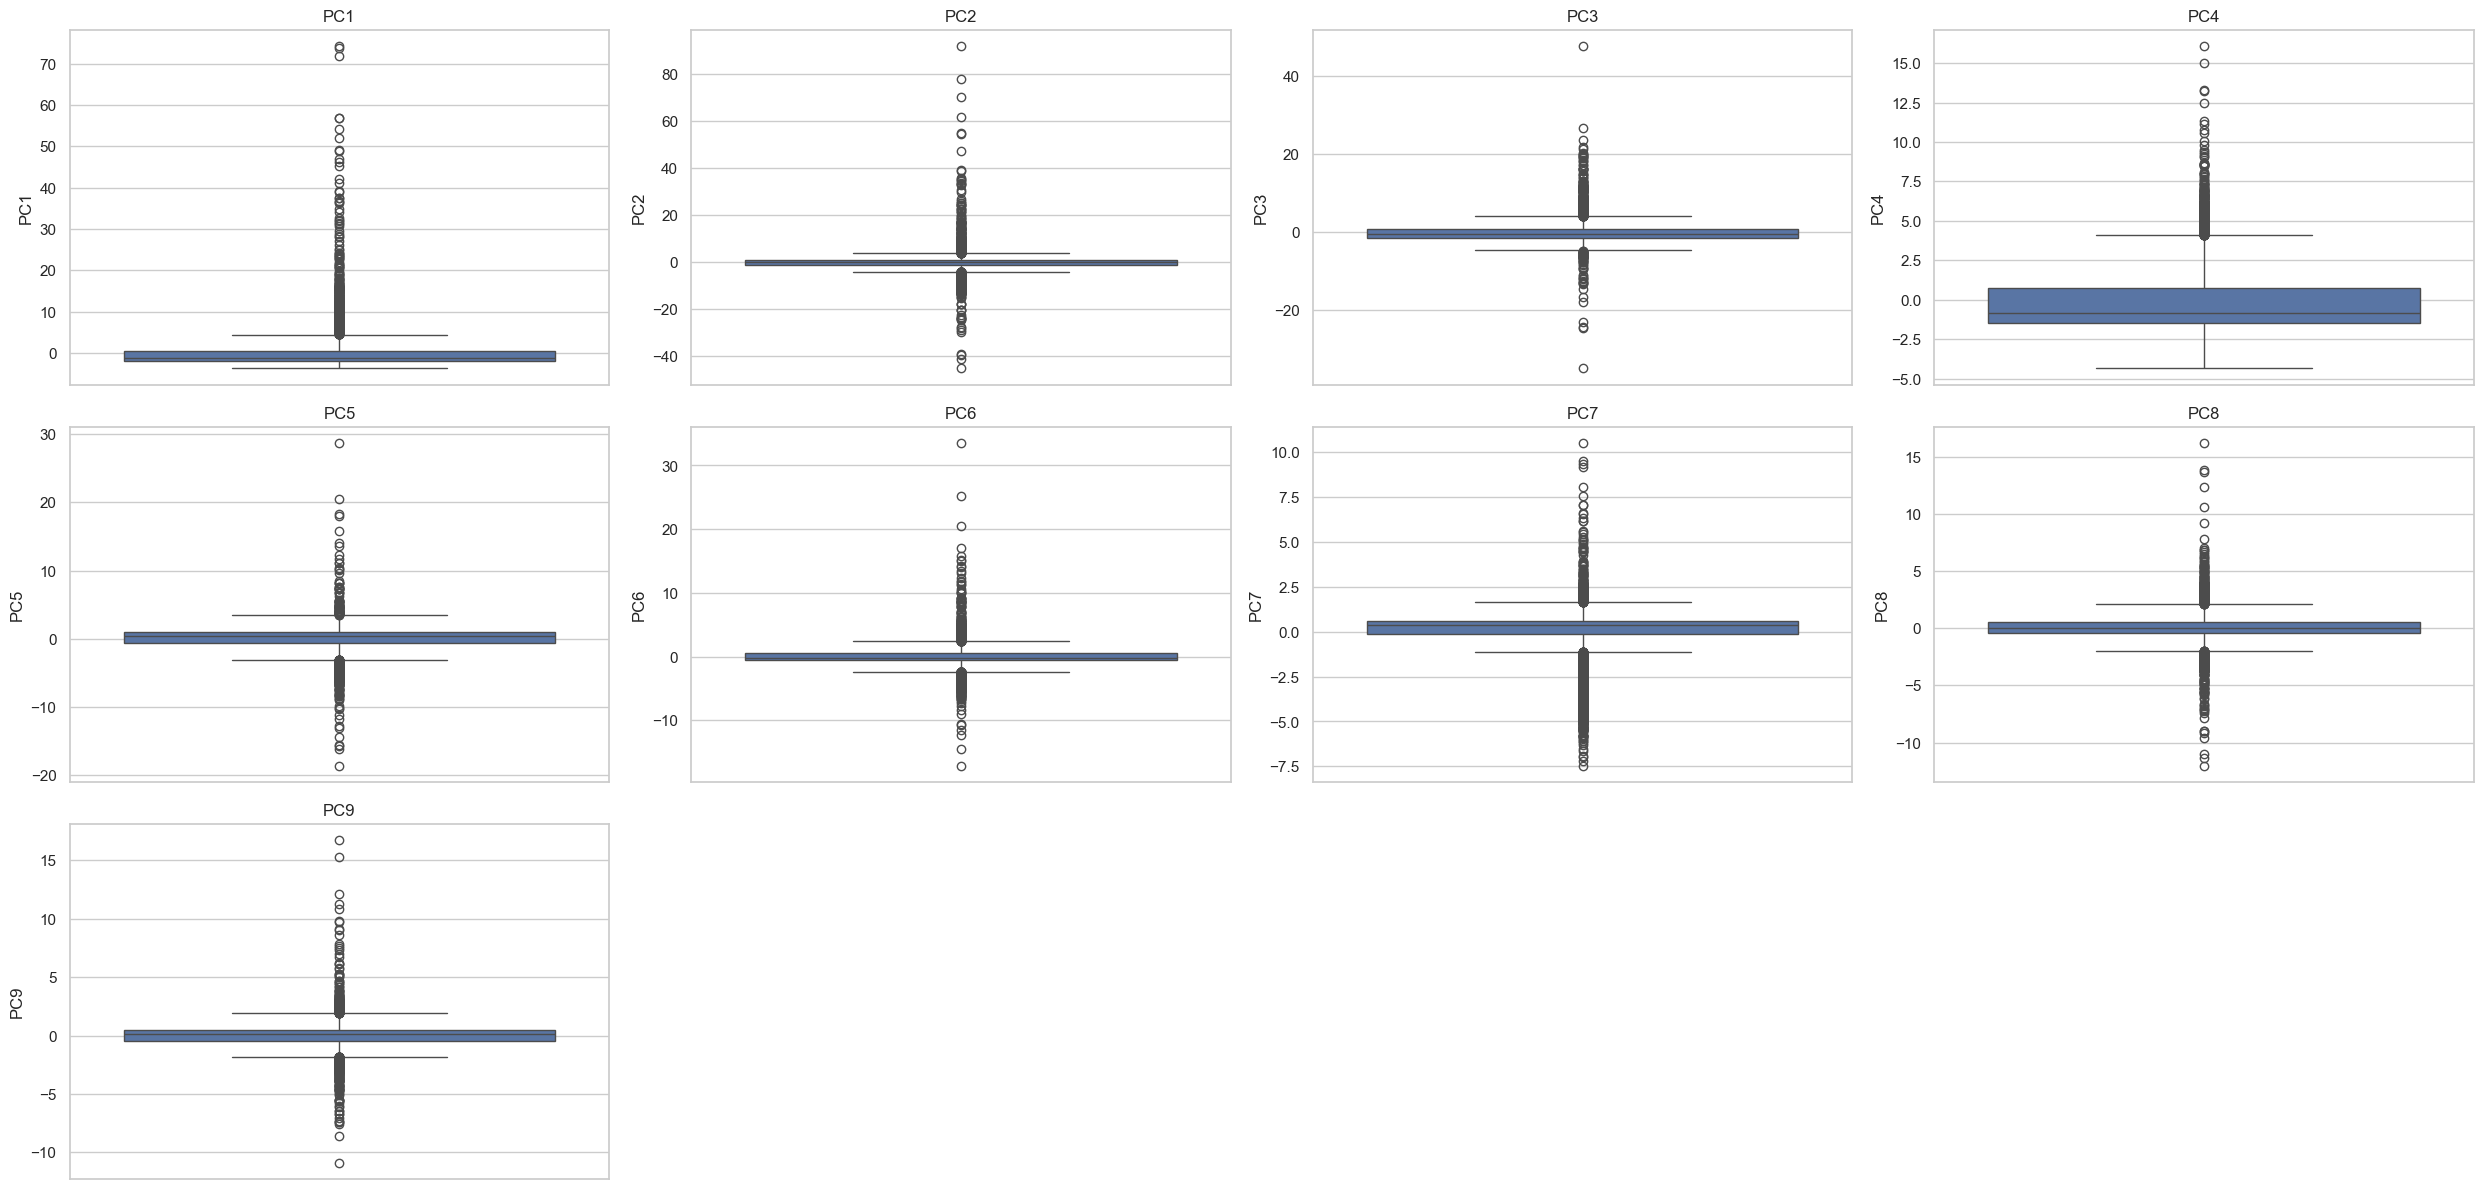

In [31]:
# plot for outliers detection

plt.figure(figsize=(25,20))
for i in range(len(pc_df.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(pc_df[pc_df.columns[i]])
    plt.title(pc_df.columns[i])

plt.tight_layout()

As we can see above, we have several outliers but atleast the absolute difference in value of features have reduced after doing robust scaling

In [17]:
def plot_function1 (model24):
    labels = model24.fit_predict(scaledData)
    plt.scatter(scaledData[0], scaledData[12], c=labels, s=40, cmap='plasma')

In [18]:
def plot_function2 (data24) :
    plt.style.use("default")
    custom_colors = ["skyblue", "yellowgreen" , 'red' , 'purple' , 'green']
    fig, ax = plt.subplots(1, 2, figsize=(12,6),facecolor='gray')
    ax[0].set_facecolor('purple')

    sns.countplot(x='cluster', data=data24 , ax=ax[0], palette=custom_colors)
    for p in ax[0].patches:
        ax[0].annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10),
                   textcoords = 'offset points')
    ax[0].grid(True)
    ax[0].set_title('Count Plot of Clusters')

    cluster_counts = data24 ['cluster'].value_counts()
    ax[1].pie(cluster_counts, labels = cluster_counts.index, autopct='%1.1f%%', startangle=90,
         colors=custom_colors)
    ax[1].set_title('Percentage of Clusters')

    plt.tight_layout()
    plt.show()


In [19]:
def plot_function3 (data24):
    columns_to_plot = ['BALANCE','PURCHASES','CASH_ADVANCE', 'CREDIT_LIMIT' ,
                   'PAYMENTS', 'MINIMUM_PAYMENTS', 'cluster']
    plt.rcParams['figure.facecolor'] = 'lightgrey'
    plt.style.use("bmh")
    sns.pairplot(data24 [columns_to_plot],  hue='cluster', corner=True)

# DBSCAN

In [32]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
eps_values = []
min_samples_values = []
for eps in range (10 , 20):
    eps = eps / 10
    for min_samples in range (9 , 15):
        DB = DBSCAN (eps = eps , min_samples = min_samples , n_jobs = -1)
        DB.fit (scaledData)

        eps_values.append(eps)
        min_samples_values.append(min_samples)
        score = silhouette_score (scaledData , DB.fit_predict(scaledData))
        silhouette.append (score)
        score1 = calinski_harabasz_score (scaledData, DB.fit_predict(scaledData))
        calinski_harabasz.append(score1)
        score2 = davies_bouldin_score (scaledData, DB.fit_predict(scaledData))
        davies_bouldin.append (score2)

df_eps = pd.DataFrame(eps_values, columns=['eps'])
df_min_samples = pd.DataFrame(min_samples_values, columns=['min_samples'])
df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_calinski_harabasz = pd.DataFrame(calinski_harabasz, columns=['calinski_harabasz'])
df_davies_bouldin = pd.DataFrame(davies_bouldin , columns=['davies_bouldin'])

result = pd.concat([df_eps, df_min_samples,df_silhouette , df_calinski_harabasz , df_davies_bouldin], axis=1)
result

,eps,min_samples,silhouette_score,calinski_harabasz,davies_bouldin
0,1.0,9,-0.346447,62.217558,1.835820
1,1.0,10,-0.334973,82.099959,1.800415
2,1.0,11,-0.305231,135.492497,2.003081
3,1.0,12,-0.306617,132.544016,2.003220
4,1.0,13,-0.306574,131.261980,2.009735
5,1.0,14,-0.307366,128.722491,2.006615
6,1.1,9,-0.259385,66.142887,1.578821
7,1.1,10,-0.249026,93.218899,1.809636
8,1.1,11,-0.110990,135.752651,1.823122
9,1.1,12,-0.115845,133.674011,1.815334


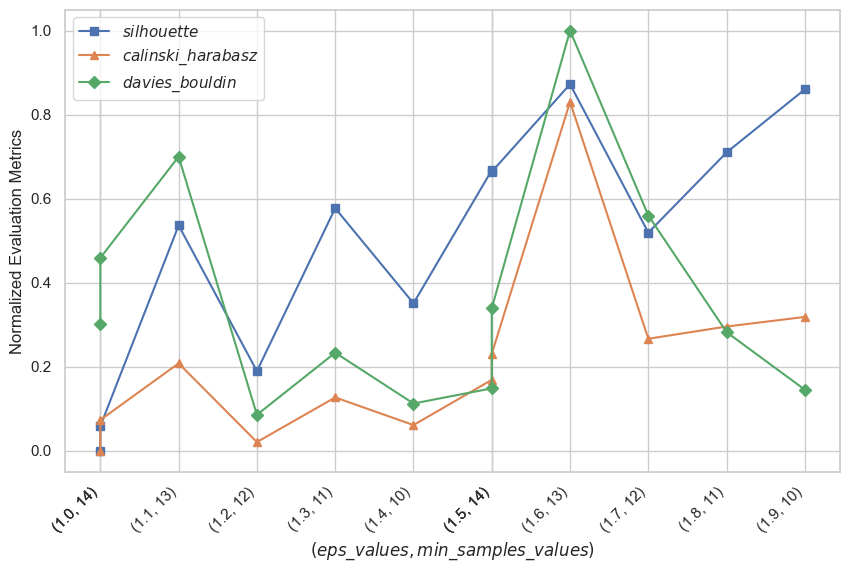

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Downsample the data to display every 6th ordered pair
downsampled_indices = range(0, len(eps_values), 5)
x_eps = [eps_values[i] for i in downsampled_indices]
x_min_samples = [min_samples_values[i] for i in downsampled_indices]

# Normalize the values to a common scale
silhouette_norm = (np.array([silhouette[i] for i in downsampled_indices]) - min(silhouette)) / (max(silhouette) - min(silhouette))
calinski_harabasz_norm = (np.array([calinski_harabasz[i] for i in downsampled_indices]) - min(calinski_harabasz)) / (max(calinski_harabasz) - min(calinski_harabasz))
davies_bouldin_norm = (np.array([davies_bouldin[i] for i in downsampled_indices]) - min(davies_bouldin)) / (max(davies_bouldin) - min(davies_bouldin))

ax.plot(x_eps, silhouette_norm, marker='s', label=r'$silhouette$')
ax.plot(x_eps, calinski_harabasz_norm, marker='^', label=r'$calinski\_harabasz$')
ax.plot(x_eps, davies_bouldin_norm, marker='D', label=r'$davies\_bouldin$')

ax.set_xlabel(r'$(eps\_values, min\_samples\_values)$', fontsize=12)
ax.set_ylabel('Normalized Evaluation Metrics', fontsize=12)
ax.set_xticks(x_eps)
ax.set_xticklabels([f'({eps}, {min_samples})' for eps, min_samples in zip(x_eps, x_min_samples)], rotation=45, ha='right')
ax.legend()

plt.show()

In [ ]:
top_5_silhouette_score = result.nlargest(5, 'silhouette_score')
top_5_silhouette_score

,eps,min_samples,silhouette_score,calinski_harabasz,davies_bouldin
59,1.9,14,0.323649,973.983228,2.419036
47,1.7,14,0.264629,872.034595,2.534219
38,1.6,11,0.248802,843.517902,2.564578
39,1.6,12,0.244150,836.778114,2.570501
40,1.6,13,0.238092,819.148969,2.592330


In [ ]:
top_5_calinski_harabasz = result.nlargest(5, 'calinski_harabasz')
top_5_calinski_harabasz

,eps,min_samples,silhouette_score,calinski_harabasz,davies_bouldin
59,1.9,14,0.323649,973.983228,2.419036
47,1.7,14,0.264629,872.034595,2.534219
38,1.6,11,0.248802,843.517902,2.564578
39,1.6,12,0.244150,836.778114,2.570501
40,1.6,13,0.238092,819.148969,2.592330


In [ ]:
top_5_davies_bouldin = result.nsmallest(5, 'davies_bouldin')
top_5_davies_bouldin

,eps,min_samples,silhouette_score,calinski_harabasz,davies_bouldin
24,1.4,9,-0.120482,96.885155,1.509641
42,1.7,9,0.057944,197.091562,1.557209
18,1.3,9,-0.128480,83.974455,1.577010
6,1.1,9,-0.259385,66.142887,1.578821
13,1.2,10,-0.213349,75.856655,1.580810


In [ ]:
print(result[(result['eps'] == 1.9) & (result['min_samples'] == 14)])

    eps  min_samples  silhouette_score  calinski_harabasz  davies_bouldin
59  1.9           14          0.323649         973.983228        2.419036


1.6 & 13 gives best

In [ ]:
DBV = df.copy ()
DB = DBSCAN (eps = 1.9 , min_samples = 14 , n_jobs = -1)
DB.fit (scaledData)
DBV ['cluster'] = DB.fit_predict (scaledData)

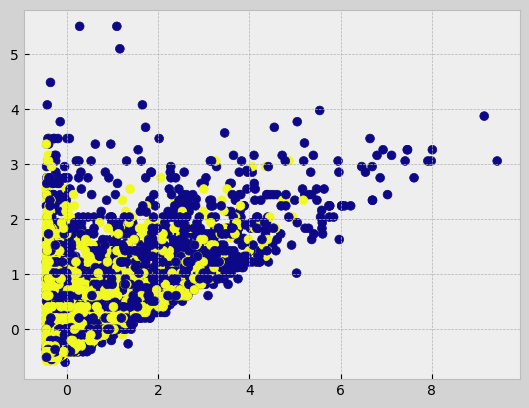

In [ ]:
plot_function1(DB)

C:\Users\vkgat\AppData\Local\Temp\ipykernel_7372\3475585266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=data24 , ax=ax[0], palette=custom_colors)
C:\Users\vkgat\AppData\Local\Temp\ipykernel_7372\3475585266.py:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x='cluster', data=data24 , ax=ax[0], palette=custom_colors)


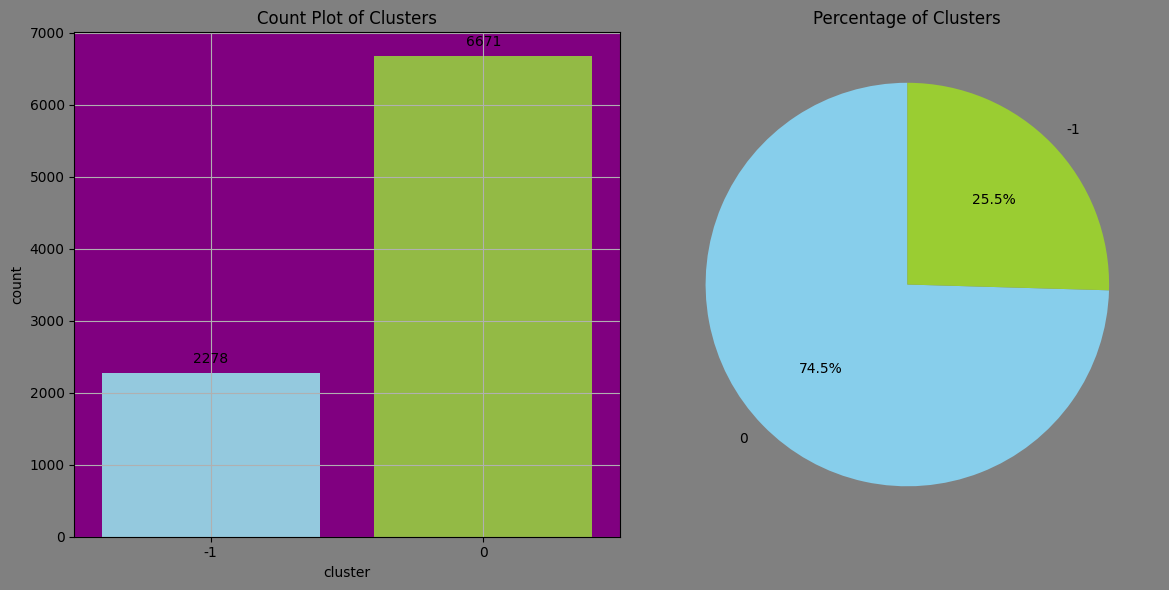

In [ ]:
plot_function2(DBV)

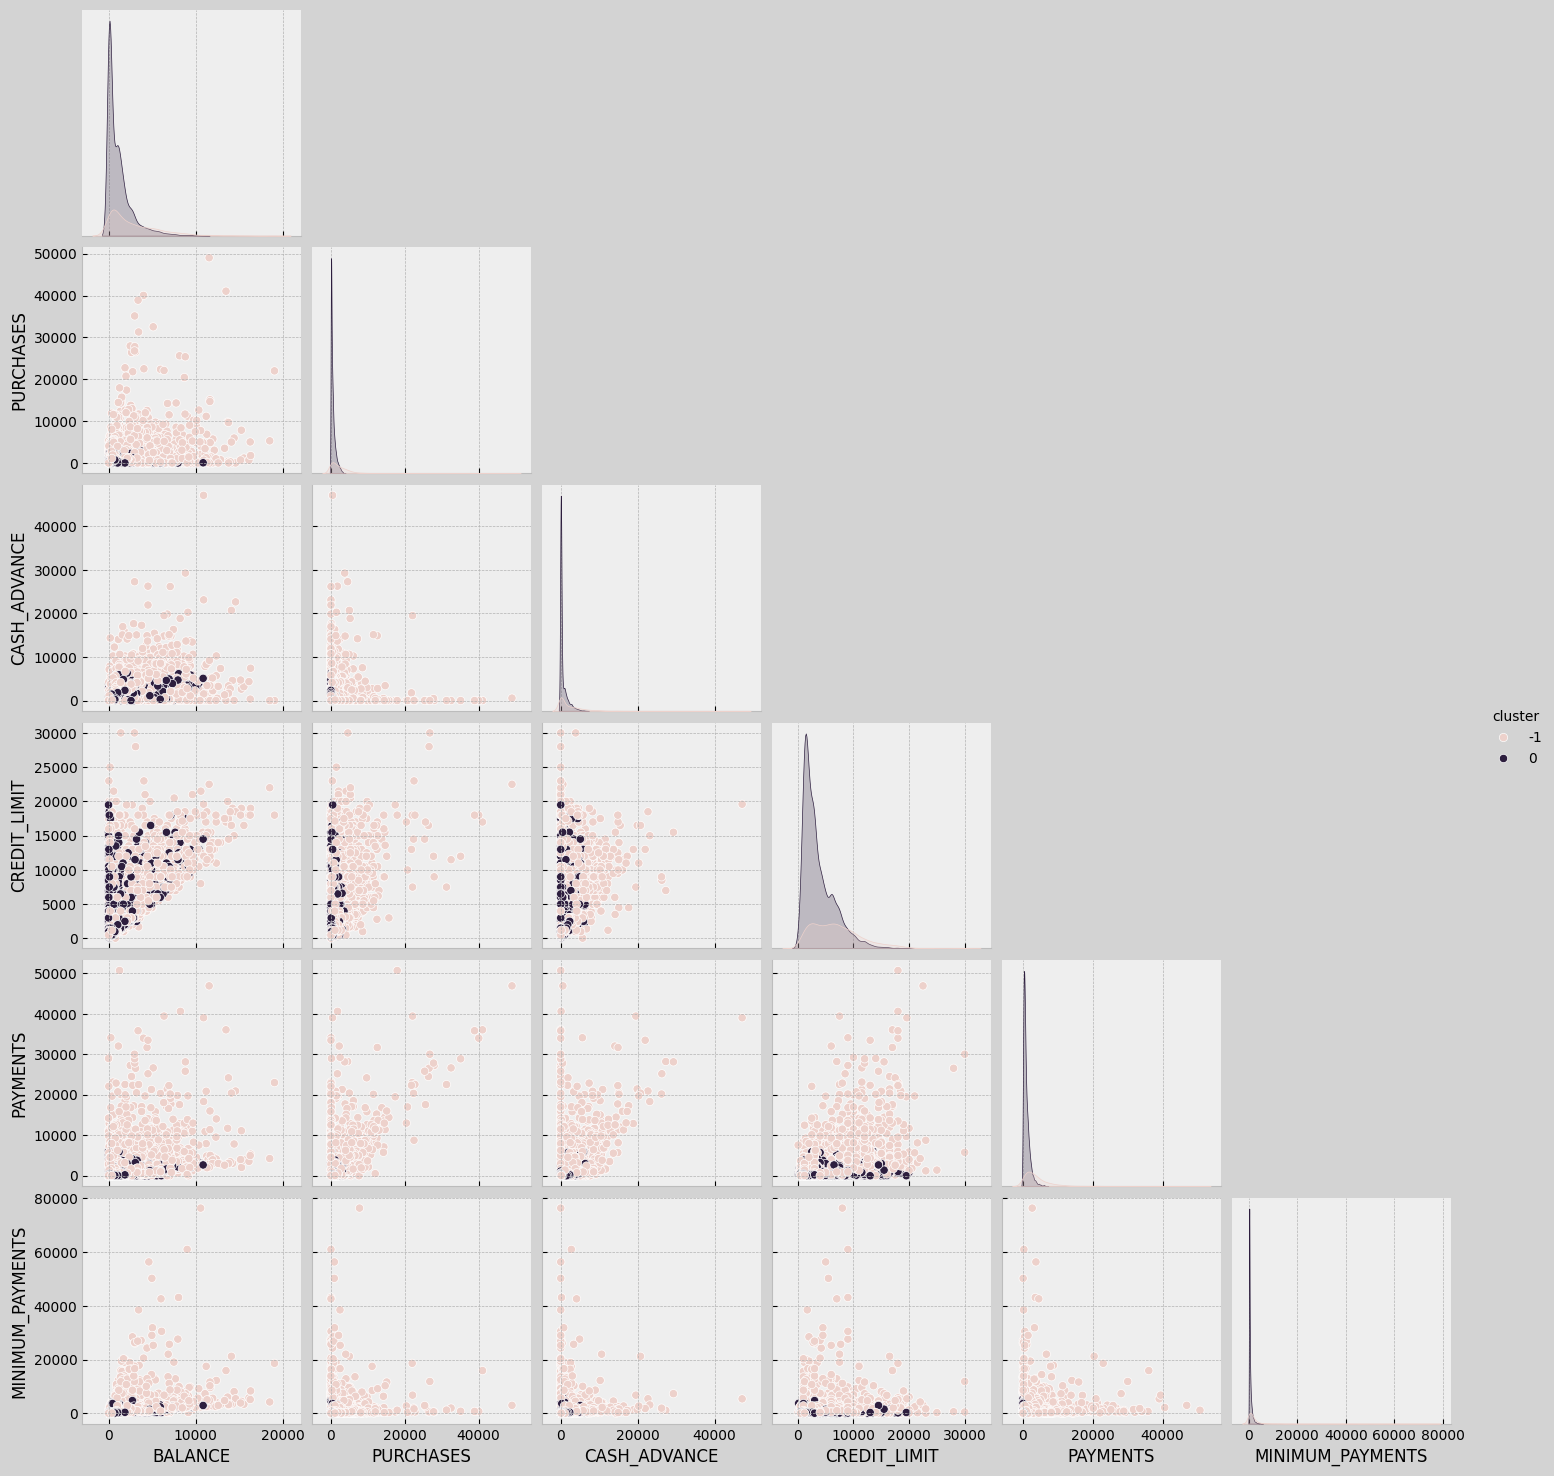

In [ ]:
plot_function3(DBV)

# K-Means

c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

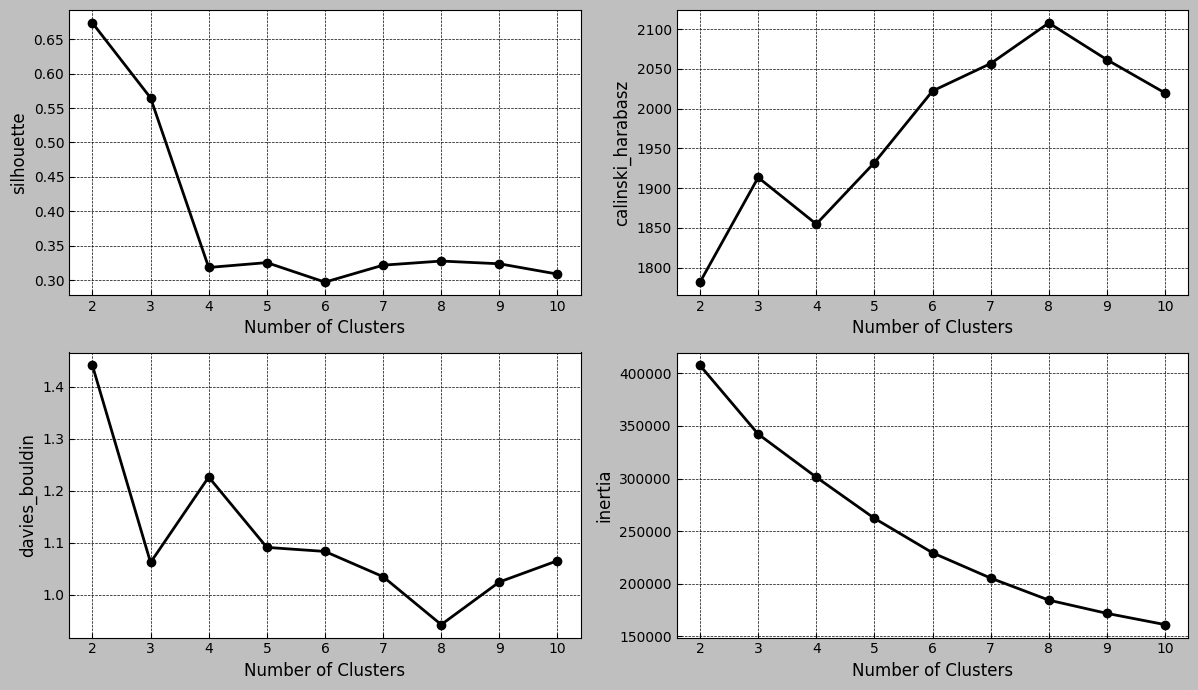

In [ ]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []
for k in range(2,11):
    kmeans = KMeans (n_clusters = k , random_state = 42)
    kmeans.fit (pc_df)

    score = silhouette_score (pc_df , kmeans.predict(pc_df))
    silhouette.append (score)

    score1 = calinski_harabasz_score (pc_df, kmeans.predict(pc_df))
    calinski_harabasz.append(score1)

    score2 = davies_bouldin_score (pc_df, kmeans.predict(pc_df))
    davies_bouldin.append (score2)

    score3 = kmeans.inertia_
    inertia.append (score3)
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin , 'inertia': inertia}
metrics_list = list(metrics.items())

for i in range(2):
    for j in range(2):
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j]
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
!pip install --upgrade kneed

In [ ]:
from kneed import KneeLocator   
# for knowing some elbows
kl1 = KneeLocator (range (2 , 11) , silhouette , curve = 'convex' , direction = 'decreasing')
print ('silhouette: ' , kl1.elbow)
kl2 = KneeLocator (range (2 , 11) , calinski_harabasz , curve = 'convex' , direction = 'decreasing')
print ('calinski_harabasz: ' , kl2.elbow)
kl3 = KneeLocator (range (2 , 11) , davies_bouldin , curve = 'convex' , direction = 'decreasing')
print ('davies_bouldin: ' , kl3.elbow)
kl4 = KneeLocator (range (2 , 11) , inertia , curve = 'convex' , direction = 'decreasing')
print ('inertia: ' , kl4.elbow)

silhouette:  4
calinski_harabasz:  2
davies_bouldin:  3
inertia:  6


In [ ]:
kmeans = KMeans (n_clusters = 3 , random_state = 42)
kmeans.fit (pc_df)

print ('silhouette_score : ' , silhouette_score (pc_df , kmeans.predict(pc_df)))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (pc_df, kmeans.predict(pc_df)))
print ('davies_bouldin_score : ' , davies_bouldin_score (pc_df, kmeans.predict(pc_df)))
print ('inertia : ' , kmeans.inertia_)

c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


silhouette_score :  0.564711262239751
calinski_harabasz_score :  1913.391712632336
davies_bouldin_score :  1.0617923673306615
inertia :  342267.4981075667


In [ ]:
silhouette = []
init_values = ['k-means++' , 'random']
for i in init_values:
    kmeans = KMeans (n_clusters = 3 , random_state = 42)
    kmeans.fit (pc_df)
    score = silhouette_score(pc_df, kmeans.predict(pc_df))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_init = pd.DataFrame(init_values, columns=['init'])
result = pd.concat([df_init, df_silhouette], axis=1)
result

c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,init,silhouette_score
0,k-means++,0.564711
1,random,0.564711


In [ ]:
silhouette = []
n_init_values = range(6, 16, 1)
for i in n_init_values:
    kmeans = KMeans (n_clusters = 3 , random_state = 42)
    kmeans.fit (pc_df)
    score = silhouette_score(pc_df, kmeans.predict(pc_df))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_n_init = pd.DataFrame(n_init_values, columns=['n_init'])
result = pd.concat([df_n_init, df_silhouette], axis=1)
result

c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

,n_init,silhouette_score
0,6,0.564711
1,7,0.564711
2,8,0.564711
3,9,0.564711
4,10,0.564711
5,11,0.564711
6,12,0.564711
7,13,0.564711
8,14,0.564711
9,15,0.564711


In [ ]:
silhouette = []
max_iter_values = range(295, 306, 1)
for i in max_iter_values:
    kmeans = KMeans (n_clusters = 3 , random_state = 42)
    kmeans.fit (pc_df)
    score = silhouette_score(pc_df, kmeans.predict(pc_df))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_max_iter = pd.DataFrame(max_iter_values, columns=['max_iter'])
result = pd.concat([df_max_iter, df_silhouette], axis=1)
result

c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

,max_iter,silhouette_score
0,295,0.564711
1,296,0.564711
2,297,0.564711
3,298,0.564711
4,299,0.564711
5,300,0.564711
6,301,0.564711
7,302,0.564711
8,303,0.564711
9,304,0.564711


In [ ]:
silhouette = []
algorithm_values = ['lloyd' , 'elkan' , 'auto' , 'full']
for i in algorithm_values:
    kmeans = KMeans (n_clusters = 3 , random_state = 42)
    kmeans.fit (pc_df)
    score = silhouette_score(pc_df, kmeans.predict(pc_df))
    silhouette.append(score)


df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_algorithm = pd.DataFrame(algorithm_values, columns=['algorithm'])
result = pd.concat([df_algorithm, df_silhouette], axis=1)
result


c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

,algorithm,silhouette_score
0,lloyd,0.564711
1,elkan,0.564711
2,auto,0.564711
3,full,0.564711


c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


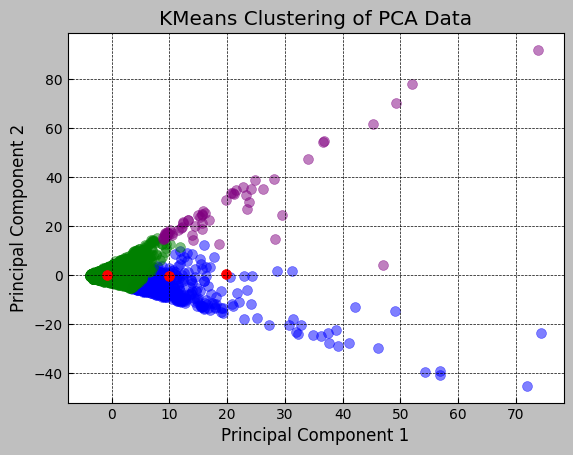

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming pc_df contains your data after PCA with 9 columns
# Adjust the index in pc_df.iloc[:, 0] and pc_df.iloc[:, 1] for the first two principal components
kmeans = KMeans(n_clusters=3, random_state=42).fit(pc_df)
centroids = kmeans.cluster_centers_

colors = ['blue', 'green', 'purple']
centroid_color = 'red'

for i in range(kmeans.n_clusters):
    plt.scatter(pc_df.iloc[:, 0][kmeans.labels_ == i],
                pc_df.iloc[:, 1][kmeans.labels_ == i],  # Adjusted to use the second principal component
                c=colors[i],
                s=50,
                alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 8], c=centroid_color, s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')  # Adjusted to use the second principal component
plt.title('KMeans Clustering of PCA Data')
plt.show()


In [ ]:
kmeansV = df.copy ()
kmeans = KMeans (n_clusters = 3 , random_state = 42)
kmeans.fit (pc_df)
kmeansV ['cluster'] = kmeans.predict (pc_df)

c:\Users\vkgat\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\vkgat\AppData\Local\Temp\ipykernel_7372\3475585266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=data24 , ax=ax[0], palette=custom_colors)
C:\Users\vkgat\AppData\Local\Temp\ipykernel_7372\3475585266.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x='cluster', data=data24 , ax=ax[0], palette=custom_colors)


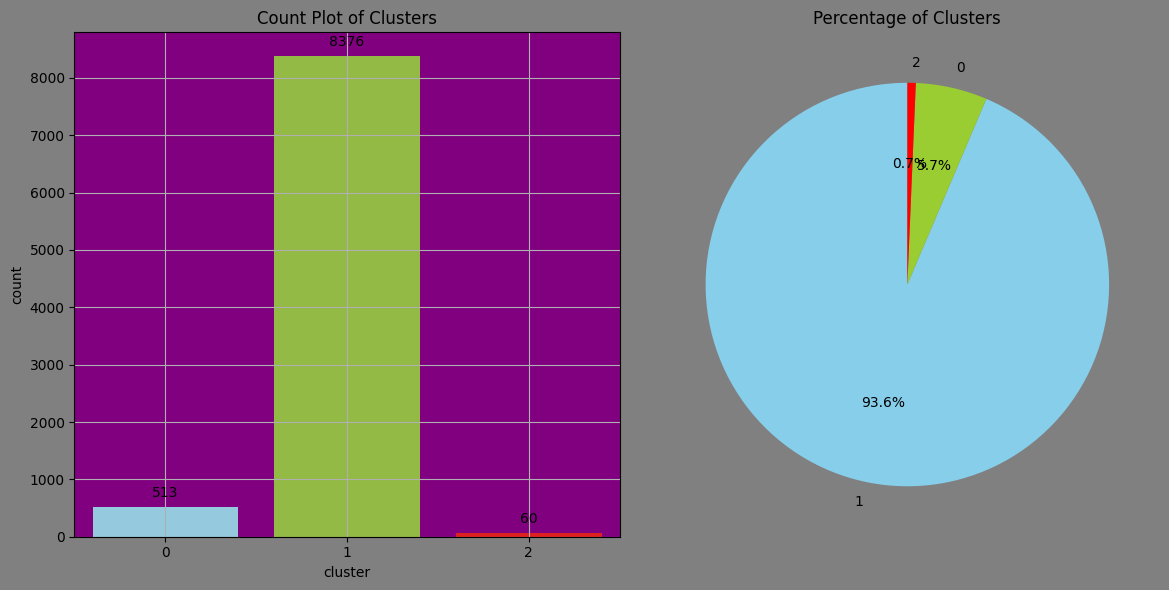

In [ ]:
plot_function2 (kmeansV)

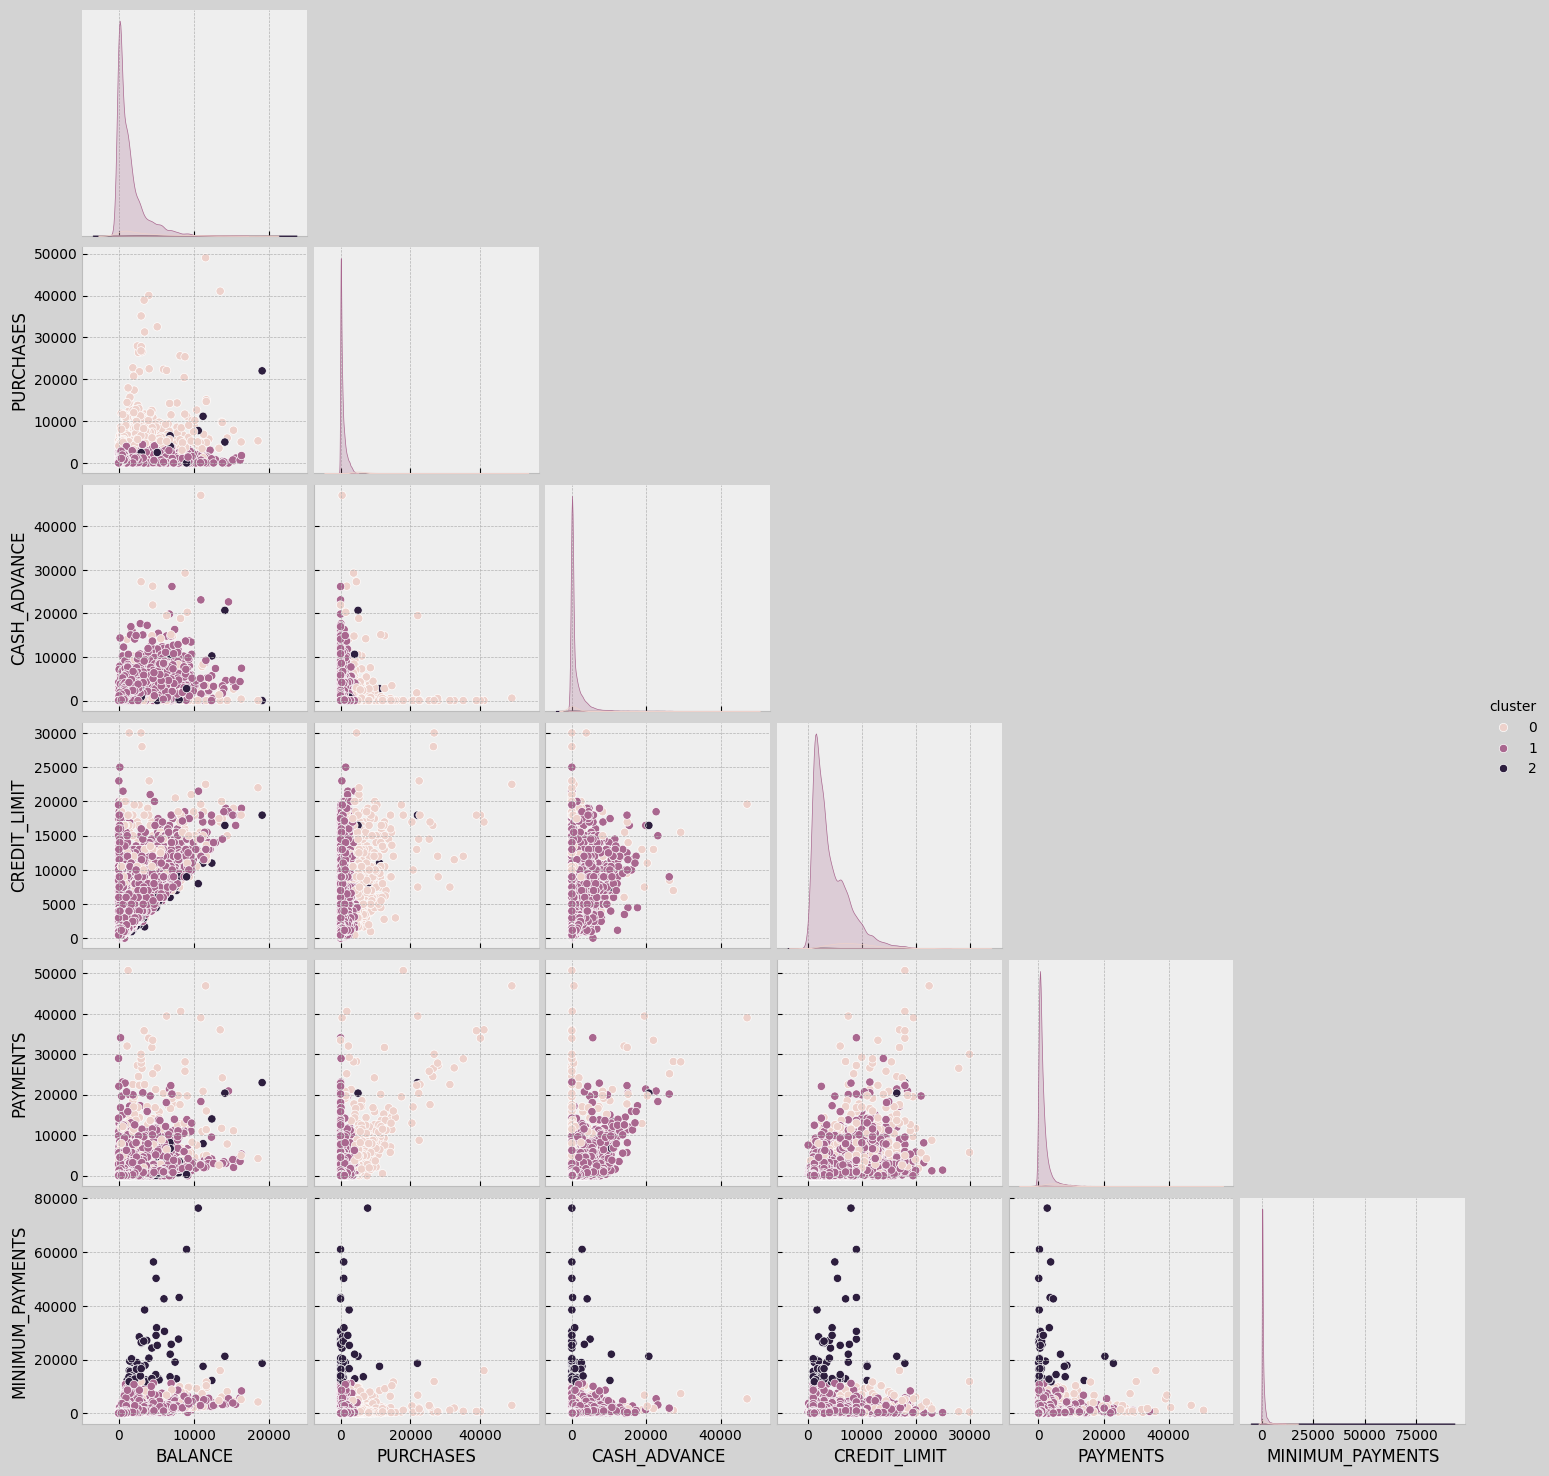

In [ ]:
plot_function3 (kmeansV)

# Hierarchical Clustering

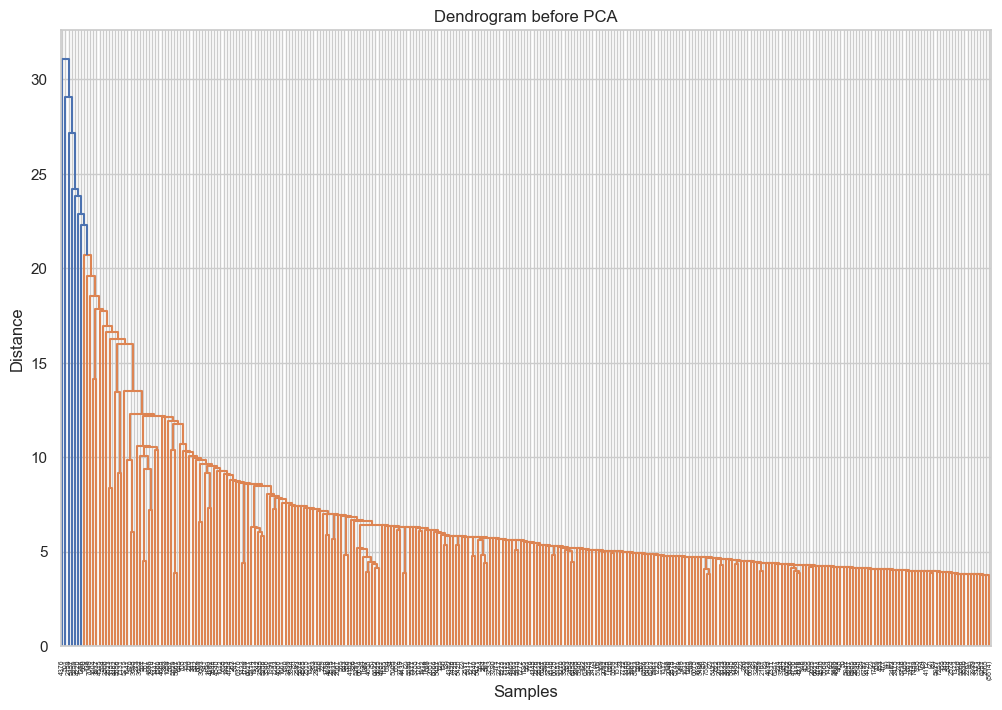

In [21]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute pairwise distances between samples using Euclidean distance
distances = np.sqrt(((pc_df - pc_df.mean()) ** 2).sum(axis=1))

# Perform hierarchical clustering on the pairwise distances
Z1 = linkage(scaledData, method='single', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z1, truncate_mode='lastp', p=300)
plt.title('Dendrogram before PCA')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import fcluster
max_d = 10
cluster_labels = fcluster(Z1, max_d, criterion='distance')
silhouette_avg = silhouette_score(pc_df, cluster_labels)
print("The average silhouette_score is :", silhouette_avg)

# Compute Davies-Bouldin index
davies_bouldin_idx = davies_bouldin_score(pc_df, cluster_labels)

# Compute Calinski-Harabasz index
calinski_harabasz_idx = calinski_harabasz_score(pc_df, cluster_labels)

print("Davies-Bouldin index:", davies_bouldin_idx)
print("Calinski-Harabasz index:", calinski_harabasz_idx)

The average silhouette_score is : 0.6468868173499566
Davies-Bouldin index: 0.24378618602878546
Calinski-Harabasz index: 103.7006724031465


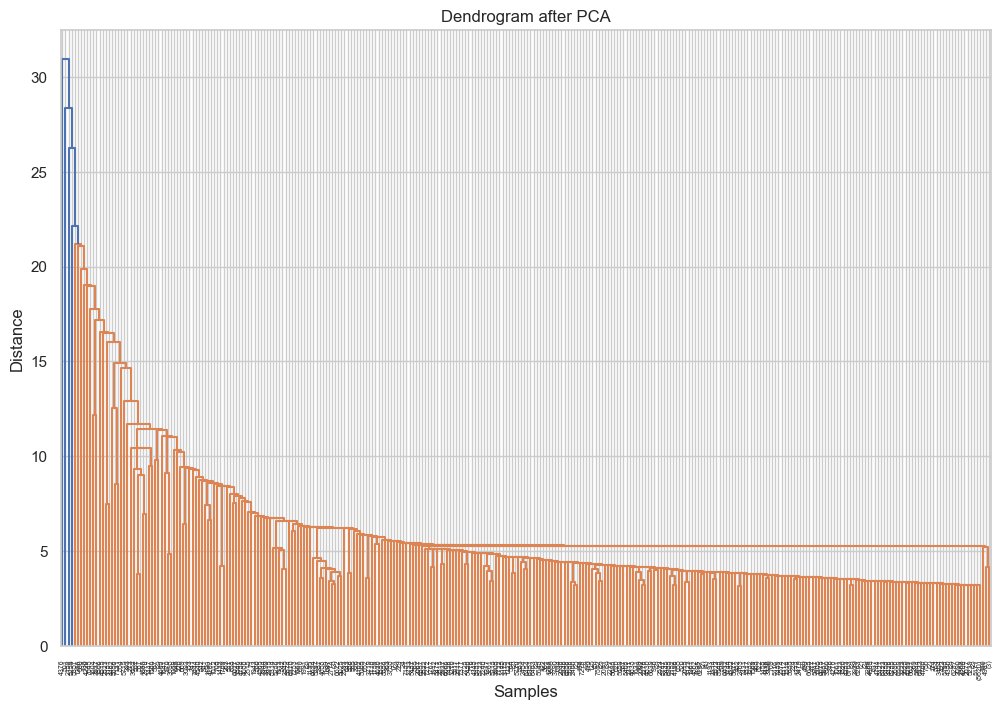

In [23]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute pairwise distances between samples using Euclidean distance
distances = np.sqrt(((pc_df - pc_df.mean()) ** 2).sum(axis=1))

# Perform hierarchical clustering on the pairwise distances
Z = linkage(pc_df, method='single', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=300)
plt.title('Dendrogram after PCA')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

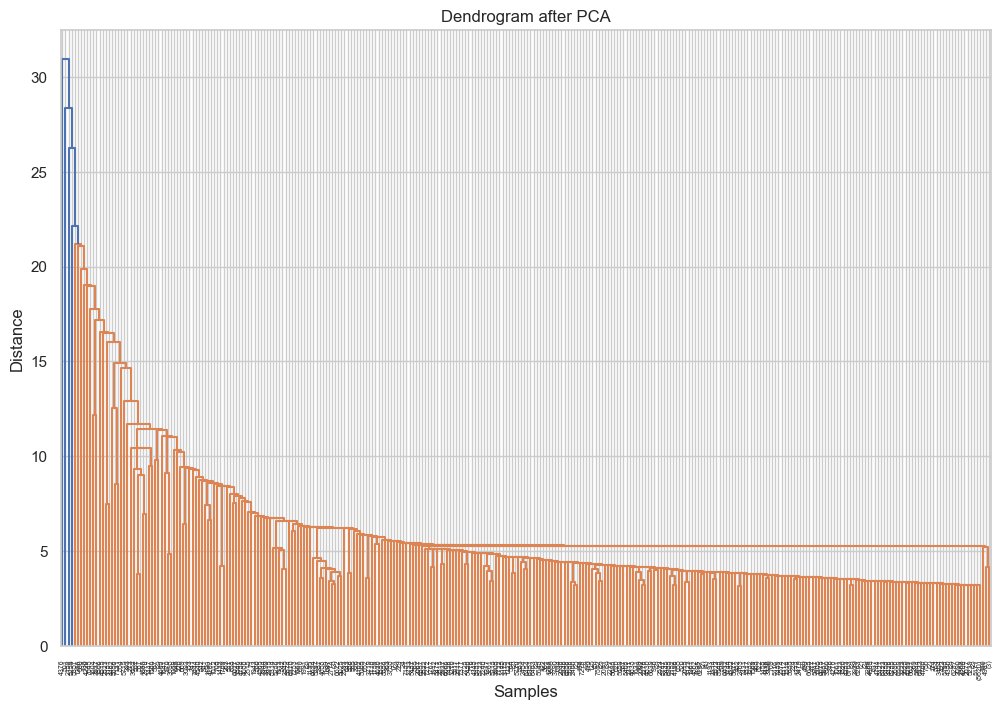

In [26]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute pairwise distances between samples using Euclidean distance
distances = np.sqrt(((pc_df - pc_df.mean()) ** 2).sum(axis=1))

# Perform hierarchical clustering on the pairwise distances
Z2 = linkage(pc_df, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=300)
plt.title('Dendrogram after PCA')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import fcluster
max_d = 10
cluster_labels = fcluster(Z2, max_d, criterion='distance')
silhouette_avg = silhouette_score(pc_df, cluster_labels)
print("The average silhouette_score is :", silhouette_avg)

# Compute Davies-Bouldin index
davies_bouldin_idx = davies_bouldin_score(pc_df, cluster_labels)

# Compute Calinski-Harabasz index
calinski_harabasz_idx = calinski_harabasz_score(pc_df, cluster_labels)

print("Davies-Bouldin index:", davies_bouldin_idx)
print("Calinski-Harabasz index:", calinski_harabasz_idx)

The average silhouette_score is : 0.14107836735181417
Davies-Bouldin index: 1.1624973382301516
Calinski-Harabasz index: 538.0964012025332


In [28]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Assuming scaledData is your scaled dataset
# Replace this with your actual scaled dataset
# scaledData = ...

silhouette = []
calinski_harabasz = []
davies_bouldin = []
distance_metrics = []
linkage_methods = []

# Define a range of distance metrics and linkage methods to try
distance_metrics_list = ['euclidean', 'cityblock']
linkage_methods_list = ['single', 'complete', 'average']

# Iterate over distance metrics and linkage methods
for distance_metric in distance_metrics_list:
    for linkage_method in linkage_methods_list:
        Z = linkage(scaledData, method=linkage_method, metric=distance_metric)

        # Compute cluster labels using hierarchical clustering
        # You may need to adjust the threshold or number of clusters based on your data
        # Here, I'll assume you want to obtain 2 clusters
        from scipy.cluster.hierarchy import fcluster
        max_d = 10  # Adjust this threshold as needed
        cluster_labels = fcluster(Z, max_d, criterion='distance')

        distance_metrics.append(distance_metric)
        linkage_methods.append(linkage_method)

        # Compute silhouette score
        score_silhouette = silhouette_score(scaledData, cluster_labels)
        silhouette.append(score_silhouette)

        # Compute Calinski-Harabasz index
        score_calinski_harabasz = calinski_harabasz_score(scaledData, cluster_labels)
        calinski_harabasz.append(score_calinski_harabasz)

        # Compute Davies-Bouldin index
        score_davies_bouldin = davies_bouldin_score(scaledData, cluster_labels)
        davies_bouldin.append(score_davies_bouldin)

# Create DataFrames for parameter values and evaluation metrics
df_distance_metrics = pd.DataFrame(distance_metrics, columns=['distance_metric'])
df_linkage_methods = pd.DataFrame(linkage_methods, columns=['linkage_method'])
df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_score'])
df_calinski_harabasz = pd.DataFrame(calinski_harabasz, columns=['calinski_harabasz'])
df_davies_bouldin = pd.DataFrame(davies_bouldin, columns=['davies_bouldin'])

# Concatenate DataFrames to create the final result
result = pd.concat([df_distance_metrics, df_linkage_methods, df_silhouette, df_calinski_harabasz, df_davies_bouldin], axis=1)
result


,distance_metric,linkage_method,silhouette_score,calinski_harabasz,davies_bouldin
0,euclidean,single,0.656088,98.763482,0.249880
1,euclidean,complete,0.149570,301.840837,0.981544
2,euclidean,average,0.257690,121.991288,0.619492
3,cityblock,single,0.030890,27.918086,0.352672
4,cityblock,complete,0.089223,186.523938,0.999565
5,cityblock,average,0.081241,123.558419,0.764660


In [38]:
AGV = df.copy ()
AG = AgglomerativeClustering (n_clusters = 2 , linkage = 'ward')
AG.fit (pc_df)
AGV ['cluster'] = AG.fit_predict (pc_df)

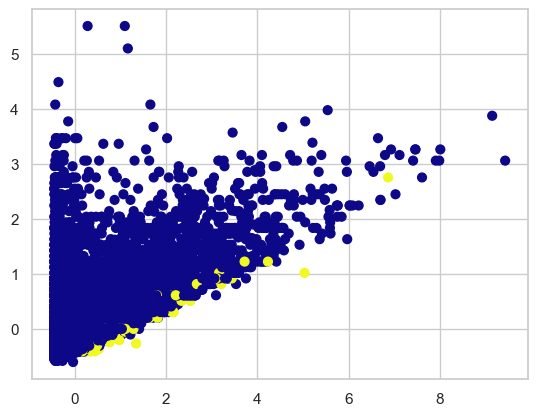

In [39]:
plot_function1 (AG)

C:\Users\vkgat\AppData\Local\Temp\ipykernel_19924\3475585266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=data24 , ax=ax[0], palette=custom_colors)
C:\Users\vkgat\AppData\Local\Temp\ipykernel_19924\3475585266.py:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x='cluster', data=data24 , ax=ax[0], palette=custom_colors)


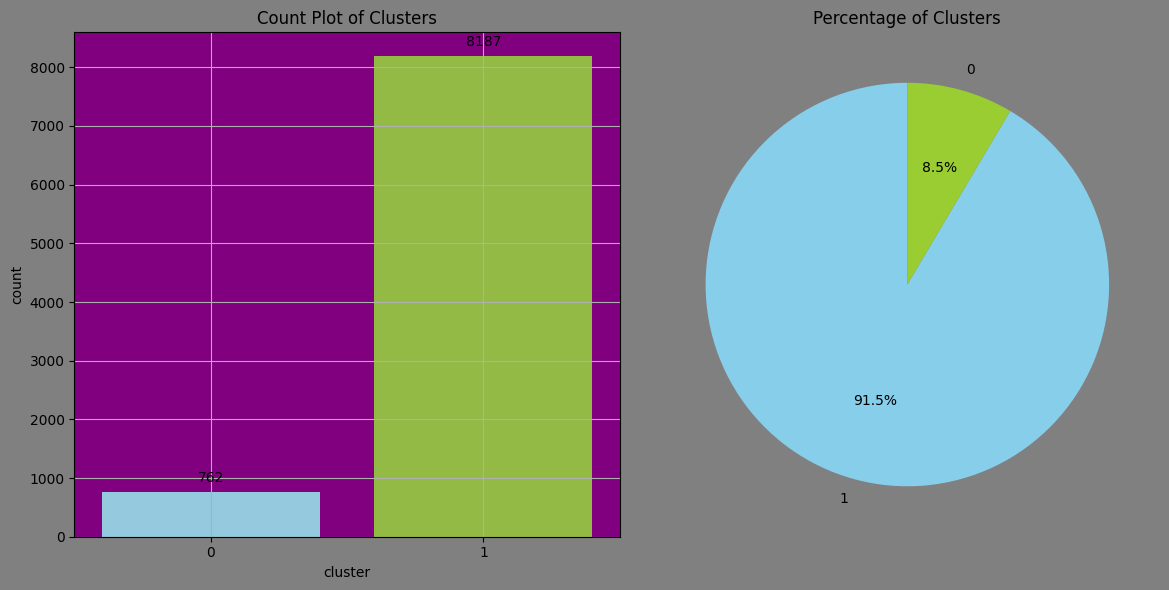

In [40]:
plot_function2 (AGV)

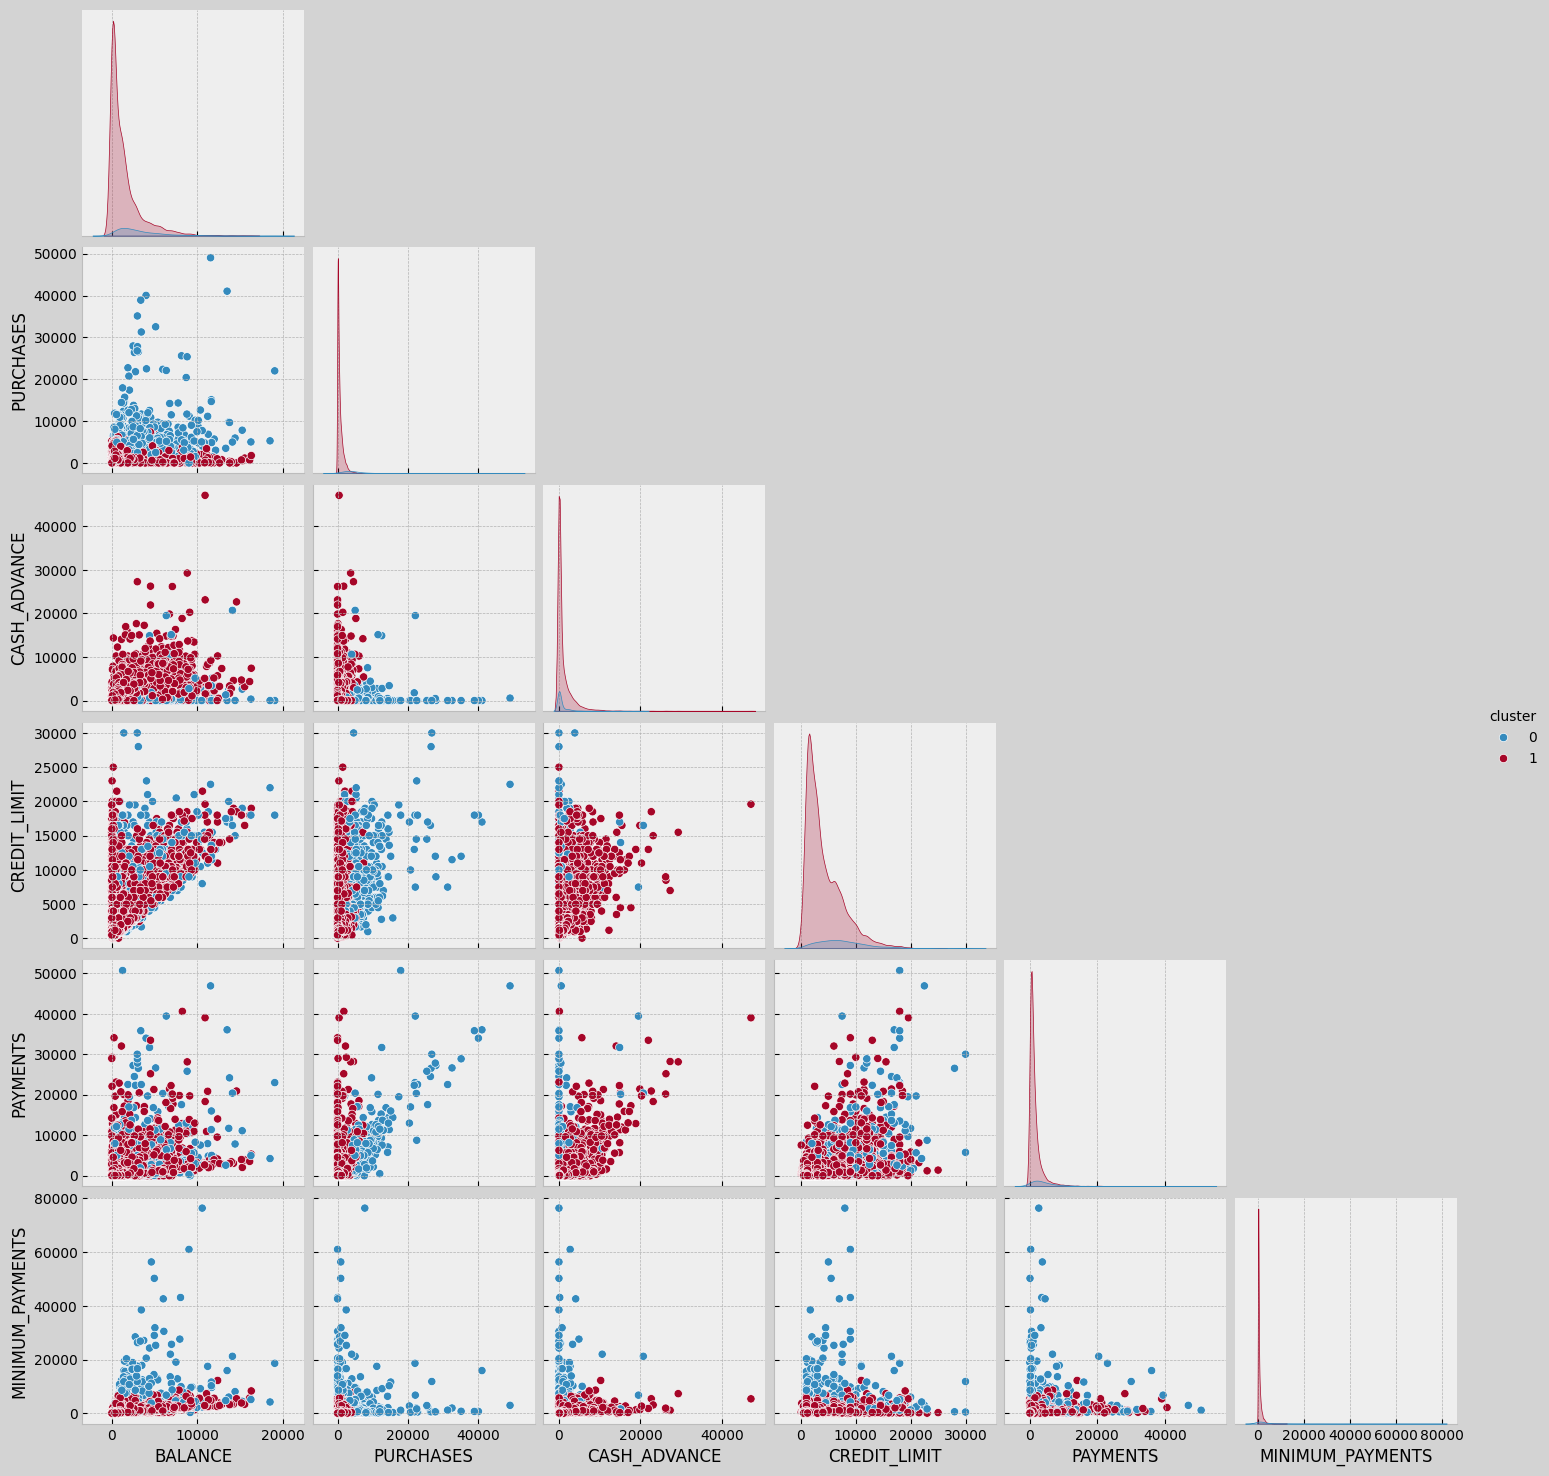

In [41]:
plot_function3 (AGV)